# import statements

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import time
import pickle
import sys
import os

from skimage.feature import hog
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
from moviepy.editor import VideoFileClip
from IPython.display import HTML

sys.path.insert(0, os.path.join(os.getcwd(),'src'))
from functions import *
from video_detector import *
from linearSVM import PegasosSVM


# Load Weights

In [2]:
w_l = np.loadtxt("weights/svm.weights")

# Initialize detector

In [3]:
svc = PegasosSVM(weights=w_l)

# Initialize hyperparameters

In [4]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 4 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off

X_scaler = None

if hist_feat or spatial_feat:
    with open('weights/x_scaler.pkl', 'rb') as f:
        X_scaler = pickle.load(f)


# End-to-End pipeline for vehicle detection on one image

In [5]:
def process_one_image(test_img):
    #test_img must be a numpy array
    predictions = []

    for scale in np.arange(1.0,3.5,0.5):
        ystart = int((test_img.shape[0]+(30*scale))/2)
        ystop = int(0.9*test_img.shape[0])
        curr_pred = find_cars(test_img, ystart, ystop, scale, svc, 
                              X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space)
        predictions += curr_pred
        
    # add detections to the history iff processing video file images
    if isinstance(detector, VehicleDetectVideo):
        if len(predictions) > 0:
            detector.addPreds(predictions)
     
    heat = np.zeros_like(test_img[:,:,0])
    
    thresh = 1
    if isinstance(detector, VehicleDetectVideo):
        # Add heat to each box in box list
        for pred_set in detector.prev_rects:
            heat = add_heat(heat,pred_set)
            thresh = 1 + len(detector.prev_rects)//2
    else:
        # Add heat to each box in box list
        heat = add_heat(heat,predictions)
        thresh = 1

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,thresh)
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    print('number of cars found:',labels[1])
    #draw final bounding boxes on a copy of the original image
    draw_img, final_predictions = draw_labeled_bboxes(np.copy(test_img), labels)
    
    return draw_img

# Test the pipleline on test images

number of cars found: 3
number of cars found: 0
number of cars found: 1
number of cars found: 4
number of cars found: 2
number of cars found: 2


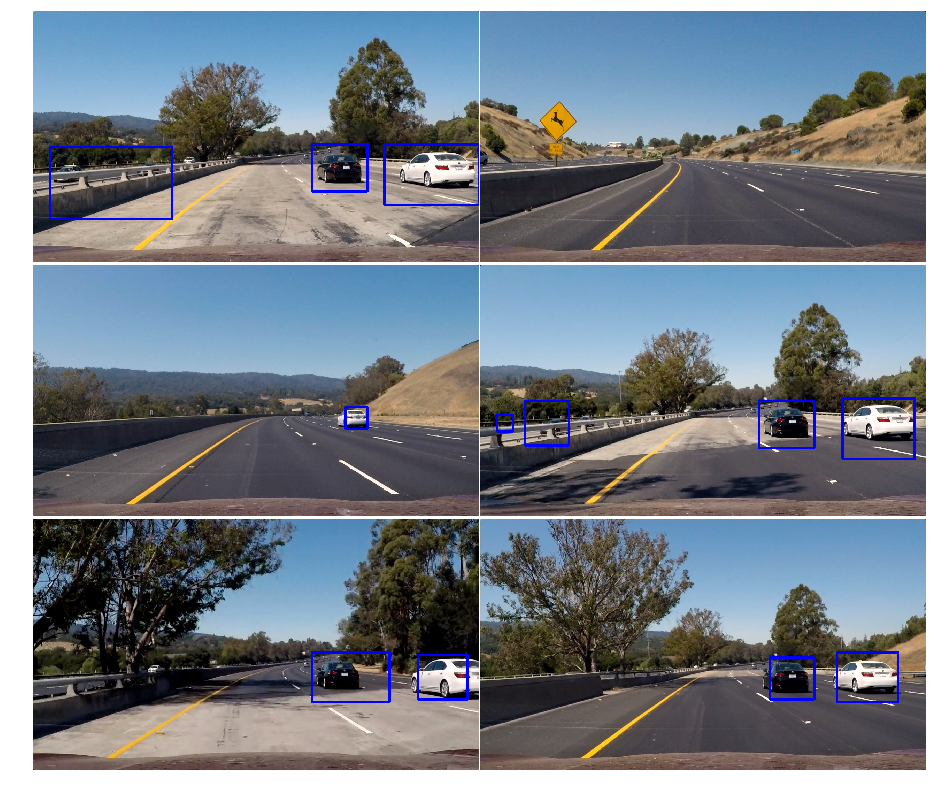

In [6]:
detector = None
test_images = glob.glob('./test_images/test*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(process_one_image(mpimg.imread(im)))
    axs[i].axis('off')

# Test the pipleline on video 1

In [7]:
detector = VehicleDetectVideo(10)

test_out_file = 'media/test_video_out.mp4'
clip_test = VideoFileClip('media/test_video.mp4')
clip_test_out = clip_test.fl_image(process_one_image)
%time clip_test_out.write_videofile(test_out_file, audio=False)
clip_test.reader.close()
clip_test.audio.reader.close_proc()
detector = None

number of cars found: 2
[MoviePy] >>>> Building video media/test_video_out.mp4
[MoviePy] Writing video media/test_video_out.mp4


  0%|                                                                                           | 0/39 [00:00<?, ?it/s]

number of cars found: 2


  3%|██▏                                                                                | 1/39 [00:01<01:09,  1.84s/it]

number of cars found: 2


  5%|████▎                                                                              | 2/39 [00:03<01:08,  1.85s/it]

number of cars found: 2


  8%|██████▍                                                                            | 3/39 [00:05<01:05,  1.83s/it]

number of cars found: 2


 10%|████████▌                                                                          | 4/39 [00:07<01:04,  1.83s/it]

number of cars found: 2


 13%|██████████▋                                                                        | 5/39 [00:09<01:02,  1.84s/it]

number of cars found: 2


 15%|████████████▊                                                                      | 6/39 [00:10<01:00,  1.83s/it]

number of cars found: 2


 18%|██████████████▉                                                                    | 7/39 [00:12<00:57,  1.80s/it]

number of cars found: 2


 21%|█████████████████                                                                  | 8/39 [00:14<00:56,  1.81s/it]

number of cars found: 2


 23%|███████████████████▏                                                               | 9/39 [00:16<00:54,  1.81s/it]

number of cars found: 2


 26%|█████████████████████                                                             | 10/39 [00:17<00:52,  1.80s/it]

number of cars found: 2


 28%|███████████████████████▏                                                          | 11/39 [00:19<00:50,  1.79s/it]

number of cars found: 2


 31%|█████████████████████████▏                                                        | 12/39 [00:21<00:48,  1.78s/it]

number of cars found: 2


 33%|███████████████████████████▎                                                      | 13/39 [00:23<00:46,  1.77s/it]

number of cars found: 2


 36%|█████████████████████████████▍                                                    | 14/39 [00:24<00:44,  1.77s/it]

number of cars found: 2


 38%|███████████████████████████████▌                                                  | 15/39 [00:26<00:42,  1.78s/it]

number of cars found: 2


 41%|█████████████████████████████████▋                                                | 16/39 [00:28<00:41,  1.78s/it]

number of cars found: 2


 44%|███████████████████████████████████▋                                              | 17/39 [00:30<00:39,  1.80s/it]

number of cars found: 2


 46%|█████████████████████████████████████▊                                            | 18/39 [00:32<00:38,  1.81s/it]

number of cars found: 2


 49%|███████████████████████████████████████▉                                          | 19/39 [00:34<00:36,  1.84s/it]

number of cars found: 2


 51%|██████████████████████████████████████████                                        | 20/39 [00:37<00:35,  1.86s/it]

number of cars found: 2


 54%|████████████████████████████████████████████▏                                     | 21/39 [00:39<00:33,  1.88s/it]

number of cars found: 2


 56%|██████████████████████████████████████████████▎                                   | 22/39 [00:41<00:32,  1.90s/it]

number of cars found: 2


 59%|████████████████████████████████████████████████▎                                 | 23/39 [00:44<00:30,  1.92s/it]

number of cars found: 2


 62%|██████████████████████████████████████████████████▍                               | 24/39 [00:46<00:29,  1.94s/it]

number of cars found: 2


 64%|████████████████████████████████████████████████████▌                             | 25/39 [00:48<00:27,  1.95s/it]

number of cars found: 2


 67%|██████████████████████████████████████████████████████▋                           | 26/39 [00:50<00:25,  1.95s/it]

number of cars found: 2


 69%|████████████████████████████████████████████████████████▊                         | 27/39 [00:52<00:23,  1.95s/it]

number of cars found: 2


 72%|██████████████████████████████████████████████████████████▊                       | 28/39 [00:54<00:21,  1.94s/it]

number of cars found: 2


 74%|████████████████████████████████████████████████████████████▉                     | 29/39 [00:56<00:19,  1.95s/it]

number of cars found: 2


 77%|███████████████████████████████████████████████████████████████                   | 30/39 [00:58<00:17,  1.96s/it]

number of cars found: 2


 79%|█████████████████████████████████████████████████████████████████▏                | 31/39 [01:00<00:15,  1.96s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████████▎              | 32/39 [01:02<00:13,  1.96s/it]

number of cars found: 2


 85%|█████████████████████████████████████████████████████████████████████▍            | 33/39 [01:05<00:11,  1.97s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████████▍          | 34/39 [01:07<00:09,  1.98s/it]

number of cars found: 2


 90%|█████████████████████████████████████████████████████████████████████████▌        | 35/39 [01:09<00:07,  1.99s/it]

number of cars found: 2


 92%|███████████████████████████████████████████████████████████████████████████▋      | 36/39 [01:11<00:05,  1.98s/it]

number of cars found: 2


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 37/39 [01:13<00:03,  1.98s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [01:15<00:01,  1.98s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: media/test_video_out.mp4 

Wall time: 1min 16s


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_out_file))

# Run Pipeline on video 2

In [9]:
detector = VehicleDetectVideo(10)

proj_out_file = 'media/project_video_out.mp4'
clip_proj = VideoFileClip('media/project_video.mp4')
clip_proj_out = clip_proj.fl_image(process_one_image)
%time clip_proj_out.write_videofile(proj_out_file, audio=False)
clip_proj.reader.close()
clip_proj.audio.reader.close_proc()

detector = None

number of cars found: 1
[MoviePy] >>>> Building video media/project_video_out.mp4
[MoviePy] Writing video media/project_video_out.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

number of cars found: 1


  0%|                                                                                 | 1/1261 [00:02<45:44,  2.18s/it]

number of cars found: 1


  0%|▏                                                                                | 2/1261 [00:04<47:16,  2.25s/it]

number of cars found: 1


  0%|▏                                                                                | 3/1261 [00:06<46:24,  2.21s/it]

number of cars found: 1


  0%|▎                                                                                | 4/1261 [00:08<46:54,  2.24s/it]

number of cars found: 1


  0%|▎                                                                                | 5/1261 [00:11<47:20,  2.26s/it]

number of cars found: 1


  0%|▍                                                                                | 6/1261 [00:13<47:29,  2.27s/it]

number of cars found: 1


  1%|▍                                                                                | 7/1261 [00:15<47:34,  2.28s/it]

number of cars found: 1


  1%|▌                                                                                | 8/1261 [00:18<47:34,  2.28s/it]

number of cars found: 1


  1%|▌                                                                                | 9/1261 [00:20<47:40,  2.28s/it]

number of cars found: 1


  1%|▋                                                                               | 10/1261 [00:22<47:43,  2.29s/it]

number of cars found: 1


  1%|▋                                                                               | 11/1261 [00:24<46:38,  2.24s/it]

number of cars found: 1


  1%|▊                                                                               | 12/1261 [00:26<45:51,  2.20s/it]

number of cars found: 1


  1%|▊                                                                               | 13/1261 [00:28<45:10,  2.17s/it]

number of cars found: 1


  1%|▉                                                                               | 14/1261 [00:30<44:43,  2.15s/it]

number of cars found: 1


  1%|▉                                                                               | 15/1261 [00:32<44:42,  2.15s/it]

number of cars found: 1


  1%|█                                                                               | 16/1261 [00:33<43:56,  2.12s/it]

number of cars found: 1


  1%|█                                                                               | 17/1261 [00:35<43:29,  2.10s/it]

number of cars found: 1


  1%|█▏                                                                              | 18/1261 [00:37<43:10,  2.08s/it]

number of cars found: 1


  2%|█▏                                                                              | 19/1261 [00:39<42:55,  2.07s/it]

number of cars found: 1


  2%|█▎                                                                              | 20/1261 [00:41<42:41,  2.06s/it]

number of cars found: 1


  2%|█▎                                                                              | 21/1261 [00:43<42:22,  2.05s/it]

number of cars found: 1


  2%|█▍                                                                              | 22/1261 [00:44<42:13,  2.05s/it]

number of cars found: 1


  2%|█▍                                                                              | 23/1261 [00:46<41:58,  2.03s/it]

number of cars found: 1


  2%|█▌                                                                              | 24/1261 [00:48<41:44,  2.02s/it]

number of cars found: 1


  2%|█▌                                                                              | 25/1261 [00:50<41:32,  2.02s/it]

number of cars found: 1


  2%|█▋                                                                              | 26/1261 [00:52<41:25,  2.01s/it]

number of cars found: 1


  2%|█▋                                                                              | 27/1261 [00:54<41:37,  2.02s/it]

number of cars found: 1


  2%|█▊                                                                              | 28/1261 [00:56<41:32,  2.02s/it]

number of cars found: 1


  2%|█▊                                                                              | 29/1261 [00:58<41:24,  2.02s/it]

number of cars found: 1


  2%|█▉                                                                              | 30/1261 [01:00<41:27,  2.02s/it]

number of cars found: 1


  2%|█▉                                                                              | 31/1261 [01:02<41:38,  2.03s/it]

number of cars found: 1


  3%|██                                                                              | 32/1261 [01:05<41:46,  2.04s/it]

number of cars found: 1


  3%|██                                                                              | 33/1261 [01:07<41:54,  2.05s/it]

number of cars found: 1


  3%|██▏                                                                             | 34/1261 [01:09<42:02,  2.06s/it]

number of cars found: 1


  3%|██▏                                                                             | 35/1261 [01:11<41:59,  2.06s/it]

number of cars found: 1


  3%|██▎                                                                             | 36/1261 [01:13<41:47,  2.05s/it]

number of cars found: 1


  3%|██▎                                                                             | 37/1261 [01:15<41:39,  2.04s/it]

number of cars found: 1


  3%|██▍                                                                             | 38/1261 [01:17<41:30,  2.04s/it]

number of cars found: 1


  3%|██▍                                                                             | 39/1261 [01:19<41:31,  2.04s/it]

number of cars found: 1


  3%|██▌                                                                             | 40/1261 [01:21<41:25,  2.04s/it]

number of cars found: 1


  3%|██▌                                                                             | 41/1261 [01:23<41:15,  2.03s/it]

number of cars found: 1


  3%|██▋                                                                             | 42/1261 [01:24<41:04,  2.02s/it]

number of cars found: 1


  3%|██▋                                                                             | 43/1261 [01:27<41:09,  2.03s/it]

number of cars found: 1


  3%|██▊                                                                             | 44/1261 [01:29<41:15,  2.03s/it]

number of cars found: 1


  4%|██▊                                                                             | 45/1261 [01:31<41:21,  2.04s/it]

number of cars found: 1


  4%|██▉                                                                             | 46/1261 [01:34<41:26,  2.05s/it]

number of cars found: 1


  4%|██▉                                                                             | 47/1261 [01:36<41:32,  2.05s/it]

number of cars found: 1


  4%|███                                                                             | 48/1261 [01:38<41:37,  2.06s/it]

number of cars found: 1


  4%|███                                                                             | 49/1261 [01:41<41:42,  2.07s/it]

number of cars found: 1


  4%|███▏                                                                            | 50/1261 [01:43<41:48,  2.07s/it]

number of cars found: 1


  4%|███▏                                                                            | 51/1261 [01:45<41:52,  2.08s/it]

number of cars found: 1


  4%|███▎                                                                            | 52/1261 [01:48<41:54,  2.08s/it]

number of cars found: 1


  4%|███▎                                                                            | 53/1261 [01:50<41:58,  2.09s/it]

number of cars found: 1


  4%|███▍                                                                            | 54/1261 [01:52<42:03,  2.09s/it]

number of cars found: 1


  4%|███▍                                                                            | 55/1261 [01:55<42:07,  2.10s/it]

number of cars found: 1


  4%|███▌                                                                            | 56/1261 [01:57<42:09,  2.10s/it]

number of cars found: 1


  5%|███▌                                                                            | 57/1261 [01:59<42:11,  2.10s/it]

number of cars found: 1


  5%|███▋                                                                            | 58/1261 [02:02<42:12,  2.11s/it]

number of cars found: 1


  5%|███▋                                                                            | 59/1261 [02:04<42:15,  2.11s/it]

number of cars found: 1


  5%|███▊                                                                            | 60/1261 [02:06<42:05,  2.10s/it]

number of cars found: 1


  5%|███▊                                                                            | 61/1261 [02:08<42:04,  2.10s/it]

number of cars found: 1


  5%|███▉                                                                            | 62/1261 [02:10<42:04,  2.11s/it]

number of cars found: 1


  5%|███▉                                                                            | 63/1261 [02:12<42:04,  2.11s/it]

number of cars found: 1


  5%|████                                                                            | 64/1261 [02:15<42:06,  2.11s/it]

number of cars found: 1


  5%|████                                                                            | 65/1261 [02:17<42:07,  2.11s/it]

number of cars found: 1


  5%|████▏                                                                           | 66/1261 [02:19<42:08,  2.12s/it]

number of cars found: 1


  5%|████▎                                                                           | 67/1261 [02:22<42:10,  2.12s/it]

number of cars found: 1


  5%|████▎                                                                           | 68/1261 [02:24<42:12,  2.12s/it]

number of cars found: 1


  5%|████▍                                                                           | 69/1261 [02:26<42:13,  2.13s/it]

number of cars found: 1


  6%|████▍                                                                           | 70/1261 [02:28<42:14,  2.13s/it]

number of cars found: 1


  6%|████▌                                                                           | 71/1261 [02:31<42:16,  2.13s/it]

number of cars found: 1


  6%|████▌                                                                           | 72/1261 [02:33<42:17,  2.13s/it]

number of cars found: 1


  6%|████▋                                                                           | 73/1261 [02:36<42:19,  2.14s/it]

number of cars found: 1


  6%|████▋                                                                           | 74/1261 [02:38<42:20,  2.14s/it]

number of cars found: 1


  6%|████▊                                                                           | 75/1261 [02:40<42:21,  2.14s/it]

number of cars found: 1


  6%|████▊                                                                           | 76/1261 [02:43<42:22,  2.15s/it]

number of cars found: 1


  6%|████▉                                                                           | 77/1261 [02:45<42:23,  2.15s/it]

number of cars found: 1


  6%|████▉                                                                           | 78/1261 [02:47<42:22,  2.15s/it]

number of cars found: 1


  6%|█████                                                                           | 79/1261 [02:49<42:22,  2.15s/it]

number of cars found: 1


  6%|█████                                                                           | 80/1261 [02:51<42:13,  2.15s/it]

number of cars found: 1


  6%|█████▏                                                                          | 81/1261 [02:53<42:14,  2.15s/it]

number of cars found: 1


  7%|█████▏                                                                          | 82/1261 [02:56<42:14,  2.15s/it]

number of cars found: 1


  7%|█████▎                                                                          | 83/1261 [02:58<42:15,  2.15s/it]

number of cars found: 1


  7%|█████▎                                                                          | 84/1261 [03:00<42:15,  2.15s/it]

number of cars found: 1


  7%|█████▍                                                                          | 85/1261 [03:03<42:16,  2.16s/it]

number of cars found: 1


  7%|█████▍                                                                          | 86/1261 [03:05<42:13,  2.16s/it]

number of cars found: 1


  7%|█████▌                                                                          | 87/1261 [03:07<42:11,  2.16s/it]

number of cars found: 1


  7%|█████▌                                                                          | 88/1261 [03:09<42:06,  2.15s/it]

number of cars found: 1


  7%|█████▋                                                                          | 89/1261 [03:11<42:06,  2.16s/it]

number of cars found: 1


  7%|█████▋                                                                          | 90/1261 [03:13<42:02,  2.15s/it]

number of cars found: 1


  7%|█████▊                                                                          | 91/1261 [03:15<41:58,  2.15s/it]

number of cars found: 1


  7%|█████▊                                                                          | 92/1261 [03:17<41:53,  2.15s/it]

number of cars found: 1


  7%|█████▉                                                                          | 93/1261 [03:19<41:50,  2.15s/it]

number of cars found: 1


  7%|█████▉                                                                          | 94/1261 [03:22<41:51,  2.15s/it]

number of cars found: 1


  8%|██████                                                                          | 95/1261 [03:23<41:43,  2.15s/it]

number of cars found: 1


  8%|██████                                                                          | 96/1261 [03:25<41:37,  2.14s/it]

number of cars found: 1


  8%|██████▏                                                                         | 97/1261 [03:27<41:30,  2.14s/it]

number of cars found: 1


  8%|██████▏                                                                         | 98/1261 [03:29<41:23,  2.14s/it]

number of cars found: 1


  8%|██████▎                                                                         | 99/1261 [03:30<41:15,  2.13s/it]

number of cars found: 1


  8%|██████▎                                                                        | 100/1261 [03:32<41:09,  2.13s/it]

number of cars found: 1


  8%|██████▎                                                                        | 101/1261 [03:34<41:02,  2.12s/it]

number of cars found: 1


  8%|██████▍                                                                        | 102/1261 [03:36<40:57,  2.12s/it]

number of cars found: 1


  8%|██████▍                                                                        | 103/1261 [03:37<40:50,  2.12s/it]

number of cars found: 1


  8%|██████▌                                                                        | 104/1261 [03:39<40:42,  2.11s/it]

number of cars found: 1


  8%|██████▌                                                                        | 105/1261 [03:41<40:37,  2.11s/it]

number of cars found: 1


  8%|██████▋                                                                        | 106/1261 [03:43<40:33,  2.11s/it]

number of cars found: 1


  8%|██████▋                                                                        | 107/1261 [03:45<40:28,  2.10s/it]

number of cars found: 1


  9%|██████▊                                                                        | 108/1261 [03:46<40:22,  2.10s/it]

number of cars found: 0


  9%|██████▊                                                                        | 109/1261 [03:48<40:18,  2.10s/it]

number of cars found: 0


  9%|██████▉                                                                        | 110/1261 [03:50<40:15,  2.10s/it]

number of cars found: 0


  9%|██████▉                                                                        | 111/1261 [03:52<40:11,  2.10s/it]

number of cars found: 0


  9%|███████                                                                        | 112/1261 [03:55<40:12,  2.10s/it]

number of cars found: 0


  9%|███████                                                                        | 113/1261 [03:57<40:10,  2.10s/it]

number of cars found: 0


  9%|███████▏                                                                       | 114/1261 [03:58<40:04,  2.10s/it]

number of cars found: 0


  9%|███████▏                                                                       | 115/1261 [04:00<39:57,  2.09s/it]

number of cars found: 1


  9%|███████▎                                                                       | 116/1261 [04:02<39:52,  2.09s/it]

number of cars found: 1


  9%|███████▎                                                                       | 117/1261 [04:04<39:48,  2.09s/it]

number of cars found: 1


  9%|███████▍                                                                       | 118/1261 [04:06<39:43,  2.08s/it]

number of cars found: 1


  9%|███████▍                                                                       | 119/1261 [04:07<39:38,  2.08s/it]

number of cars found: 1


 10%|███████▌                                                                       | 120/1261 [04:09<39:33,  2.08s/it]

number of cars found: 1


 10%|███████▌                                                                       | 121/1261 [04:11<39:29,  2.08s/it]

number of cars found: 1


 10%|███████▋                                                                       | 122/1261 [04:13<39:27,  2.08s/it]

number of cars found: 1


 10%|███████▋                                                                       | 123/1261 [04:15<39:23,  2.08s/it]

number of cars found: 1


 10%|███████▊                                                                       | 124/1261 [04:17<39:19,  2.08s/it]

number of cars found: 1


 10%|███████▊                                                                       | 125/1261 [04:19<39:13,  2.07s/it]

number of cars found: 1


 10%|███████▉                                                                       | 126/1261 [04:20<39:08,  2.07s/it]

number of cars found: 1


 10%|███████▉                                                                       | 127/1261 [04:22<39:04,  2.07s/it]

number of cars found: 1


 10%|████████                                                                       | 128/1261 [04:24<38:58,  2.06s/it]

number of cars found: 0


 10%|████████                                                                       | 129/1261 [04:26<38:55,  2.06s/it]

number of cars found: 0


 10%|████████▏                                                                      | 130/1261 [04:27<38:50,  2.06s/it]

number of cars found: 0


 10%|████████▏                                                                      | 131/1261 [04:29<38:44,  2.06s/it]

number of cars found: 0


 10%|████████▎                                                                      | 132/1261 [04:31<38:39,  2.05s/it]

number of cars found: 1


 11%|████████▎                                                                      | 133/1261 [04:33<38:36,  2.05s/it]

number of cars found: 1


 11%|████████▍                                                                      | 134/1261 [04:35<38:34,  2.05s/it]

number of cars found: 1


 11%|████████▍                                                                      | 135/1261 [04:37<38:31,  2.05s/it]

number of cars found: 1


 11%|████████▌                                                                      | 136/1261 [04:39<38:29,  2.05s/it]

number of cars found: 1


 11%|████████▌                                                                      | 137/1261 [04:41<38:26,  2.05s/it]

number of cars found: 1


 11%|████████▋                                                                      | 138/1261 [04:43<38:23,  2.05s/it]

number of cars found: 1


 11%|████████▋                                                                      | 139/1261 [04:45<38:21,  2.05s/it]

number of cars found: 1


 11%|████████▊                                                                      | 140/1261 [04:46<38:16,  2.05s/it]

number of cars found: 1


 11%|████████▊                                                                      | 141/1261 [04:48<38:14,  2.05s/it]

number of cars found: 1


 11%|████████▉                                                                      | 142/1261 [04:50<38:11,  2.05s/it]

number of cars found: 1


 11%|████████▉                                                                      | 143/1261 [04:52<38:06,  2.05s/it]

number of cars found: 1


 11%|█████████                                                                      | 144/1261 [04:54<38:03,  2.04s/it]

number of cars found: 1


 11%|█████████                                                                      | 145/1261 [04:56<38:00,  2.04s/it]

number of cars found: 1


 12%|█████████▏                                                                     | 146/1261 [04:58<37:56,  2.04s/it]

number of cars found: 1


 12%|█████████▏                                                                     | 147/1261 [04:59<37:52,  2.04s/it]

number of cars found: 1


 12%|█████████▎                                                                     | 148/1261 [05:01<37:48,  2.04s/it]

number of cars found: 1


 12%|█████████▎                                                                     | 149/1261 [05:03<37:44,  2.04s/it]

number of cars found: 1


 12%|█████████▍                                                                     | 150/1261 [05:05<37:40,  2.03s/it]

number of cars found: 1


 12%|█████████▍                                                                     | 151/1261 [05:06<37:35,  2.03s/it]

number of cars found: 1


 12%|█████████▌                                                                     | 152/1261 [05:08<37:31,  2.03s/it]

number of cars found: 1


 12%|█████████▌                                                                     | 153/1261 [05:10<37:27,  2.03s/it]

number of cars found: 1


 12%|█████████▋                                                                     | 154/1261 [05:12<37:24,  2.03s/it]

number of cars found: 1


 12%|█████████▋                                                                     | 155/1261 [05:14<37:21,  2.03s/it]

number of cars found: 1


 12%|█████████▊                                                                     | 156/1261 [05:15<37:17,  2.03s/it]

number of cars found: 1


 12%|█████████▊                                                                     | 157/1261 [05:17<37:14,  2.02s/it]

number of cars found: 1


 13%|█████████▉                                                                     | 158/1261 [05:19<37:12,  2.02s/it]

number of cars found: 1


 13%|█████████▉                                                                     | 159/1261 [05:21<37:07,  2.02s/it]

number of cars found: 1


 13%|██████████                                                                     | 160/1261 [05:23<37:05,  2.02s/it]

number of cars found: 1


 13%|██████████                                                                     | 161/1261 [05:25<37:03,  2.02s/it]

number of cars found: 1


 13%|██████████▏                                                                    | 162/1261 [05:27<37:01,  2.02s/it]

number of cars found: 1


 13%|██████████▏                                                                    | 163/1261 [05:29<36:57,  2.02s/it]

number of cars found: 1


 13%|██████████▎                                                                    | 164/1261 [05:31<36:54,  2.02s/it]

number of cars found: 1


 13%|██████████▎                                                                    | 165/1261 [05:33<36:52,  2.02s/it]

number of cars found: 2


 13%|██████████▍                                                                    | 166/1261 [05:34<36:49,  2.02s/it]

number of cars found: 1


 13%|██████████▍                                                                    | 167/1261 [05:37<36:47,  2.02s/it]

number of cars found: 1


 13%|██████████▌                                                                    | 168/1261 [05:38<36:44,  2.02s/it]

number of cars found: 1


 13%|██████████▌                                                                    | 169/1261 [05:40<36:41,  2.02s/it]

number of cars found: 1


 13%|██████████▋                                                                    | 170/1261 [05:42<36:38,  2.02s/it]

number of cars found: 1


 14%|██████████▋                                                                    | 171/1261 [05:44<36:35,  2.01s/it]

number of cars found: 1


 14%|██████████▊                                                                    | 172/1261 [05:46<36:34,  2.01s/it]

number of cars found: 1


 14%|██████████▊                                                                    | 173/1261 [05:48<36:31,  2.01s/it]

number of cars found: 1


 14%|██████████▉                                                                    | 174/1261 [05:50<36:28,  2.01s/it]

number of cars found: 1


 14%|██████████▉                                                                    | 175/1261 [05:51<36:23,  2.01s/it]

number of cars found: 1


 14%|███████████                                                                    | 176/1261 [05:53<36:19,  2.01s/it]

number of cars found: 1


 14%|███████████                                                                    | 177/1261 [05:55<36:16,  2.01s/it]

number of cars found: 1


 14%|███████████▏                                                                   | 178/1261 [05:57<36:12,  2.01s/it]

number of cars found: 1


 14%|███████████▏                                                                   | 179/1261 [05:58<36:09,  2.00s/it]

number of cars found: 1


 14%|███████████▎                                                                   | 180/1261 [06:00<36:05,  2.00s/it]

number of cars found: 1


 14%|███████████▎                                                                   | 181/1261 [06:02<36:02,  2.00s/it]

number of cars found: 1


 14%|███████████▍                                                                   | 182/1261 [06:04<35:58,  2.00s/it]

number of cars found: 1


 15%|███████████▍                                                                   | 183/1261 [06:05<35:54,  2.00s/it]

number of cars found: 1


 15%|███████████▌                                                                   | 184/1261 [06:07<35:51,  2.00s/it]

number of cars found: 1


 15%|███████████▌                                                                   | 185/1261 [06:09<35:50,  2.00s/it]

number of cars found: 1


 15%|███████████▋                                                                   | 186/1261 [06:11<35:48,  2.00s/it]

number of cars found: 1


 15%|███████████▋                                                                   | 187/1261 [06:13<35:46,  2.00s/it]

number of cars found: 1


 15%|███████████▊                                                                   | 188/1261 [06:15<35:44,  2.00s/it]

number of cars found: 1


 15%|███████████▊                                                                   | 189/1261 [06:17<35:42,  2.00s/it]

number of cars found: 1


 15%|███████████▉                                                                   | 190/1261 [06:19<35:40,  2.00s/it]

number of cars found: 1


 15%|███████████▉                                                                   | 191/1261 [06:21<35:38,  2.00s/it]

number of cars found: 1


 15%|████████████                                                                   | 192/1261 [06:23<35:36,  2.00s/it]

number of cars found: 1


 15%|████████████                                                                   | 193/1261 [06:25<35:35,  2.00s/it]

number of cars found: 1


 15%|████████████▏                                                                  | 194/1261 [06:28<35:35,  2.00s/it]

number of cars found: 1


 15%|████████████▏                                                                  | 195/1261 [06:30<35:35,  2.00s/it]

number of cars found: 1


 16%|████████████▎                                                                  | 196/1261 [06:32<35:35,  2.00s/it]

number of cars found: 1


 16%|████████████▎                                                                  | 197/1261 [06:35<35:35,  2.01s/it]

number of cars found: 1


 16%|████████████▍                                                                  | 198/1261 [06:37<35:35,  2.01s/it]

number of cars found: 1


 16%|████████████▍                                                                  | 199/1261 [06:40<35:34,  2.01s/it]

number of cars found: 1


 16%|████████████▌                                                                  | 200/1261 [06:42<35:34,  2.01s/it]

number of cars found: 1


 16%|████████████▌                                                                  | 201/1261 [06:44<35:34,  2.01s/it]

number of cars found: 1


 16%|████████████▋                                                                  | 202/1261 [06:46<35:33,  2.01s/it]

number of cars found: 1


 16%|████████████▋                                                                  | 203/1261 [06:49<35:32,  2.02s/it]

number of cars found: 1


 16%|████████████▊                                                                  | 204/1261 [06:51<35:32,  2.02s/it]

number of cars found: 1


 16%|████████████▊                                                                  | 205/1261 [06:53<35:32,  2.02s/it]

number of cars found: 1


 16%|████████████▉                                                                  | 206/1261 [06:56<35:32,  2.02s/it]

number of cars found: 1


 16%|████████████▉                                                                  | 207/1261 [06:58<35:31,  2.02s/it]

number of cars found: 1


 16%|█████████████                                                                  | 208/1261 [07:01<35:31,  2.02s/it]

number of cars found: 1


 17%|█████████████                                                                  | 209/1261 [07:03<35:31,  2.03s/it]

number of cars found: 1


 17%|█████████████▏                                                                 | 210/1261 [07:05<35:30,  2.03s/it]

number of cars found: 1


 17%|█████████████▏                                                                 | 211/1261 [07:08<35:30,  2.03s/it]

number of cars found: 1


 17%|█████████████▎                                                                 | 212/1261 [07:10<35:29,  2.03s/it]

number of cars found: 1


 17%|█████████████▎                                                                 | 213/1261 [07:12<35:28,  2.03s/it]

number of cars found: 1


 17%|█████████████▍                                                                 | 214/1261 [07:15<35:28,  2.03s/it]

number of cars found: 1


 17%|█████████████▍                                                                 | 215/1261 [07:17<35:27,  2.03s/it]

number of cars found: 1


 17%|█████████████▌                                                                 | 216/1261 [07:19<35:26,  2.04s/it]

number of cars found: 1


 17%|█████████████▌                                                                 | 217/1261 [07:22<35:26,  2.04s/it]

number of cars found: 1


 17%|█████████████▋                                                                 | 218/1261 [07:24<35:25,  2.04s/it]

number of cars found: 1


 17%|█████████████▋                                                                 | 219/1261 [07:26<35:25,  2.04s/it]

number of cars found: 1


 17%|█████████████▊                                                                 | 220/1261 [07:29<35:24,  2.04s/it]

number of cars found: 1


 18%|█████████████▊                                                                 | 221/1261 [07:31<35:24,  2.04s/it]

number of cars found: 1


 18%|█████████████▉                                                                 | 222/1261 [07:33<35:23,  2.04s/it]

number of cars found: 1


 18%|█████████████▉                                                                 | 223/1261 [07:36<35:22,  2.05s/it]

number of cars found: 1


 18%|██████████████                                                                 | 224/1261 [07:38<35:22,  2.05s/it]

number of cars found: 1


 18%|██████████████                                                                 | 225/1261 [07:40<35:21,  2.05s/it]

number of cars found: 1


 18%|██████████████▏                                                                | 226/1261 [07:43<35:20,  2.05s/it]

number of cars found: 1


 18%|██████████████▏                                                                | 227/1261 [07:45<35:20,  2.05s/it]

number of cars found: 1


 18%|██████████████▎                                                                | 228/1261 [07:47<35:19,  2.05s/it]

number of cars found: 1


 18%|██████████████▎                                                                | 229/1261 [07:50<35:18,  2.05s/it]

number of cars found: 1


 18%|██████████████▍                                                                | 230/1261 [07:52<35:18,  2.05s/it]

number of cars found: 1


 18%|██████████████▍                                                                | 231/1261 [07:54<35:17,  2.06s/it]

number of cars found: 1


 18%|██████████████▌                                                                | 232/1261 [07:57<35:16,  2.06s/it]

number of cars found: 1


 18%|██████████████▌                                                                | 233/1261 [07:59<35:15,  2.06s/it]

number of cars found: 1


 19%|██████████████▋                                                                | 234/1261 [08:01<35:15,  2.06s/it]

number of cars found: 1


 19%|██████████████▋                                                                | 235/1261 [08:04<35:14,  2.06s/it]

number of cars found: 1


 19%|██████████████▊                                                                | 236/1261 [08:06<35:13,  2.06s/it]

number of cars found: 1


 19%|██████████████▊                                                                | 237/1261 [08:08<35:12,  2.06s/it]

number of cars found: 1


 19%|██████████████▉                                                                | 238/1261 [08:11<35:11,  2.06s/it]

number of cars found: 1


 19%|██████████████▉                                                                | 239/1261 [08:13<35:10,  2.07s/it]

number of cars found: 1


 19%|███████████████                                                                | 240/1261 [08:15<35:09,  2.07s/it]

number of cars found: 1


 19%|███████████████                                                                | 241/1261 [08:18<35:08,  2.07s/it]

number of cars found: 1


 19%|███████████████▏                                                               | 242/1261 [08:20<35:07,  2.07s/it]

number of cars found: 1


 19%|███████████████▏                                                               | 243/1261 [08:22<35:06,  2.07s/it]

number of cars found: 1


 19%|███████████████▎                                                               | 244/1261 [08:25<35:05,  2.07s/it]

number of cars found: 1


 19%|███████████████▎                                                               | 245/1261 [08:27<35:04,  2.07s/it]

number of cars found: 1


 20%|███████████████▍                                                               | 246/1261 [08:29<35:03,  2.07s/it]

number of cars found: 1


 20%|███████████████▍                                                               | 247/1261 [08:32<35:02,  2.07s/it]

number of cars found: 1


 20%|███████████████▌                                                               | 248/1261 [08:34<35:01,  2.07s/it]

number of cars found: 1


 20%|███████████████▌                                                               | 249/1261 [08:36<35:00,  2.08s/it]

number of cars found: 1


 20%|███████████████▋                                                               | 250/1261 [08:39<34:59,  2.08s/it]

number of cars found: 1


 20%|███████████████▋                                                               | 251/1261 [08:41<34:56,  2.08s/it]

number of cars found: 1


 20%|███████████████▊                                                               | 252/1261 [08:43<34:54,  2.08s/it]

number of cars found: 1


 20%|███████████████▊                                                               | 253/1261 [08:45<34:52,  2.08s/it]

number of cars found: 1


 20%|███████████████▉                                                               | 254/1261 [08:47<34:50,  2.08s/it]

number of cars found: 1


 20%|███████████████▉                                                               | 255/1261 [08:49<34:48,  2.08s/it]

number of cars found: 1


 20%|████████████████                                                               | 256/1261 [08:51<34:46,  2.08s/it]

number of cars found: 1


 20%|████████████████                                                               | 257/1261 [08:53<34:44,  2.08s/it]

number of cars found: 1


 20%|████████████████▏                                                              | 258/1261 [08:55<34:41,  2.08s/it]

number of cars found: 1


 21%|████████████████▏                                                              | 259/1261 [08:57<34:40,  2.08s/it]

number of cars found: 1


 21%|████████████████▎                                                              | 260/1261 [08:59<34:37,  2.08s/it]

number of cars found: 1


 21%|████████████████▎                                                              | 261/1261 [09:01<34:35,  2.08s/it]

number of cars found: 1


 21%|████████████████▍                                                              | 262/1261 [09:03<34:33,  2.08s/it]

number of cars found: 1


 21%|████████████████▍                                                              | 263/1261 [09:05<34:31,  2.08s/it]

number of cars found: 1


 21%|████████████████▌                                                              | 264/1261 [09:07<34:29,  2.08s/it]

number of cars found: 1


 21%|████████████████▌                                                              | 265/1261 [09:10<34:27,  2.08s/it]

number of cars found: 1


 21%|████████████████▋                                                              | 266/1261 [09:12<34:25,  2.08s/it]

number of cars found: 1


 21%|████████████████▋                                                              | 267/1261 [09:14<34:23,  2.08s/it]

number of cars found: 1


 21%|████████████████▊                                                              | 268/1261 [09:16<34:21,  2.08s/it]

number of cars found: 1


 21%|████████████████▊                                                              | 269/1261 [09:18<34:19,  2.08s/it]

number of cars found: 1


 21%|████████████████▉                                                              | 270/1261 [09:20<34:17,  2.08s/it]

number of cars found: 1


 21%|████████████████▉                                                              | 271/1261 [09:22<34:15,  2.08s/it]

number of cars found: 1


 22%|█████████████████                                                              | 272/1261 [09:24<34:14,  2.08s/it]

number of cars found: 1


 22%|█████████████████                                                              | 273/1261 [09:27<34:12,  2.08s/it]

number of cars found: 1


 22%|█████████████████▏                                                             | 274/1261 [09:29<34:11,  2.08s/it]

number of cars found: 1


 22%|█████████████████▏                                                             | 275/1261 [09:31<34:10,  2.08s/it]

number of cars found: 1


 22%|█████████████████▎                                                             | 276/1261 [09:34<34:09,  2.08s/it]

number of cars found: 1


 22%|█████████████████▎                                                             | 277/1261 [09:36<34:08,  2.08s/it]

number of cars found: 1


 22%|█████████████████▍                                                             | 278/1261 [09:38<34:07,  2.08s/it]

number of cars found: 1


 22%|█████████████████▍                                                             | 279/1261 [09:41<34:05,  2.08s/it]

number of cars found: 1


 22%|█████████████████▌                                                             | 280/1261 [09:43<34:04,  2.08s/it]

number of cars found: 1


 22%|█████████████████▌                                                             | 281/1261 [09:45<34:03,  2.08s/it]

number of cars found: 1


 22%|█████████████████▋                                                             | 282/1261 [09:47<34:00,  2.08s/it]

number of cars found: 1


 22%|█████████████████▋                                                             | 283/1261 [09:49<33:56,  2.08s/it]

number of cars found: 1


 23%|█████████████████▊                                                             | 284/1261 [09:51<33:54,  2.08s/it]

number of cars found: 1


 23%|█████████████████▊                                                             | 285/1261 [09:53<33:51,  2.08s/it]

number of cars found: 1


 23%|█████████████████▉                                                             | 286/1261 [09:55<33:48,  2.08s/it]

number of cars found: 1


 23%|█████████████████▉                                                             | 287/1261 [09:57<33:46,  2.08s/it]

number of cars found: 1


 23%|██████████████████                                                             | 288/1261 [09:59<33:45,  2.08s/it]

number of cars found: 1


 23%|██████████████████                                                             | 289/1261 [10:01<33:44,  2.08s/it]

number of cars found: 1


 23%|██████████████████▏                                                            | 290/1261 [10:04<33:42,  2.08s/it]

number of cars found: 1


 23%|██████████████████▏                                                            | 291/1261 [10:06<33:41,  2.08s/it]

number of cars found: 1


 23%|██████████████████▎                                                            | 292/1261 [10:08<33:40,  2.09s/it]

number of cars found: 1


 23%|██████████████████▎                                                            | 293/1261 [10:11<33:39,  2.09s/it]

number of cars found: 1


 23%|██████████████████▍                                                            | 294/1261 [10:13<33:38,  2.09s/it]

number of cars found: 1


 23%|██████████████████▍                                                            | 295/1261 [10:15<33:36,  2.09s/it]

number of cars found: 1


 23%|██████████████████▌                                                            | 296/1261 [10:18<33:35,  2.09s/it]

number of cars found: 1


 24%|██████████████████▌                                                            | 297/1261 [10:20<33:34,  2.09s/it]

number of cars found: 1


 24%|██████████████████▋                                                            | 298/1261 [10:22<33:32,  2.09s/it]

number of cars found: 1


 24%|██████████████████▋                                                            | 299/1261 [10:25<33:31,  2.09s/it]

number of cars found: 1


 24%|██████████████████▊                                                            | 300/1261 [10:27<33:30,  2.09s/it]

number of cars found: 1


 24%|██████████████████▊                                                            | 301/1261 [10:29<33:28,  2.09s/it]

number of cars found: 1


 24%|██████████████████▉                                                            | 302/1261 [10:32<33:27,  2.09s/it]

number of cars found: 1


 24%|██████████████████▉                                                            | 303/1261 [10:34<33:26,  2.09s/it]

number of cars found: 1


 24%|███████████████████                                                            | 304/1261 [10:36<33:24,  2.10s/it]

number of cars found: 1


 24%|███████████████████                                                            | 305/1261 [10:39<33:23,  2.10s/it]

number of cars found: 1


 24%|███████████████████▏                                                           | 306/1261 [10:41<33:22,  2.10s/it]

number of cars found: 1


 24%|███████████████████▏                                                           | 307/1261 [10:43<33:20,  2.10s/it]

number of cars found: 1


 24%|███████████████████▎                                                           | 308/1261 [10:46<33:19,  2.10s/it]

number of cars found: 1


 25%|███████████████████▎                                                           | 309/1261 [10:48<33:17,  2.10s/it]

number of cars found: 1


 25%|███████████████████▍                                                           | 310/1261 [10:50<33:16,  2.10s/it]

number of cars found: 1


 25%|███████████████████▍                                                           | 311/1261 [10:53<33:14,  2.10s/it]

number of cars found: 1


 25%|███████████████████▌                                                           | 312/1261 [10:55<33:12,  2.10s/it]

number of cars found: 1


 25%|███████████████████▌                                                           | 313/1261 [10:57<33:10,  2.10s/it]

number of cars found: 1


 25%|███████████████████▋                                                           | 314/1261 [10:59<33:07,  2.10s/it]

number of cars found: 1


 25%|███████████████████▋                                                           | 315/1261 [11:01<33:05,  2.10s/it]

number of cars found: 1


 25%|███████████████████▊                                                           | 316/1261 [11:02<33:02,  2.10s/it]

number of cars found: 1


 25%|███████████████████▊                                                           | 317/1261 [11:04<32:59,  2.10s/it]

number of cars found: 1


 25%|███████████████████▉                                                           | 318/1261 [11:06<32:56,  2.10s/it]

number of cars found: 1


 25%|███████████████████▉                                                           | 319/1261 [11:08<32:53,  2.10s/it]

number of cars found: 1


 25%|████████████████████                                                           | 320/1261 [11:10<32:50,  2.09s/it]

number of cars found: 1


 25%|████████████████████                                                           | 321/1261 [11:12<32:48,  2.09s/it]

number of cars found: 1


 26%|████████████████████▏                                                          | 322/1261 [11:14<32:45,  2.09s/it]

number of cars found: 1


 26%|████████████████████▏                                                          | 323/1261 [11:16<32:43,  2.09s/it]

number of cars found: 1


 26%|████████████████████▎                                                          | 324/1261 [11:18<32:40,  2.09s/it]

number of cars found: 1


 26%|████████████████████▎                                                          | 325/1261 [11:19<32:38,  2.09s/it]

number of cars found: 1


 26%|████████████████████▍                                                          | 326/1261 [11:21<32:35,  2.09s/it]

number of cars found: 1


 26%|████████████████████▍                                                          | 327/1261 [11:23<32:33,  2.09s/it]

number of cars found: 1


 26%|████████████████████▌                                                          | 328/1261 [11:25<32:31,  2.09s/it]

number of cars found: 1


 26%|████████████████████▌                                                          | 329/1261 [11:27<32:28,  2.09s/it]

number of cars found: 1


 26%|████████████████████▋                                                          | 330/1261 [11:29<32:26,  2.09s/it]

number of cars found: 1


 26%|████████████████████▋                                                          | 331/1261 [11:31<32:23,  2.09s/it]

number of cars found: 1


 26%|████████████████████▊                                                          | 332/1261 [11:33<32:21,  2.09s/it]

number of cars found: 1


 26%|████████████████████▊                                                          | 333/1261 [11:35<32:19,  2.09s/it]

number of cars found: 1


 26%|████████████████████▉                                                          | 334/1261 [11:37<32:16,  2.09s/it]

number of cars found: 1


 27%|████████████████████▉                                                          | 335/1261 [11:39<32:14,  2.09s/it]

number of cars found: 1


 27%|█████████████████████                                                          | 336/1261 [11:41<32:11,  2.09s/it]

number of cars found: 1


 27%|█████████████████████                                                          | 337/1261 [11:43<32:08,  2.09s/it]

number of cars found: 1


 27%|█████████████████████▏                                                         | 338/1261 [11:45<32:05,  2.09s/it]

number of cars found: 1


 27%|█████████████████████▏                                                         | 339/1261 [11:47<32:03,  2.09s/it]

number of cars found: 1


 27%|█████████████████████▎                                                         | 340/1261 [11:49<32:00,  2.09s/it]

number of cars found: 1


 27%|█████████████████████▎                                                         | 341/1261 [11:51<31:58,  2.09s/it]

number of cars found: 1


 27%|█████████████████████▍                                                         | 342/1261 [11:53<31:56,  2.08s/it]

number of cars found: 1


 27%|█████████████████████▍                                                         | 343/1261 [11:54<31:53,  2.08s/it]

number of cars found: 1


 27%|█████████████████████▌                                                         | 344/1261 [11:56<31:50,  2.08s/it]

number of cars found: 1


 27%|█████████████████████▌                                                         | 345/1261 [11:58<31:47,  2.08s/it]

number of cars found: 1


 27%|█████████████████████▋                                                         | 346/1261 [12:00<31:45,  2.08s/it]

number of cars found: 1


 28%|█████████████████████▋                                                         | 347/1261 [12:02<31:42,  2.08s/it]

number of cars found: 1


 28%|█████████████████████▊                                                         | 348/1261 [12:03<31:39,  2.08s/it]

number of cars found: 1


 28%|█████████████████████▊                                                         | 349/1261 [12:05<31:36,  2.08s/it]

number of cars found: 1


 28%|█████████████████████▉                                                         | 350/1261 [12:07<31:34,  2.08s/it]

number of cars found: 1


 28%|█████████████████████▉                                                         | 351/1261 [12:09<31:31,  2.08s/it]

number of cars found: 1


 28%|██████████████████████                                                         | 352/1261 [12:11<31:29,  2.08s/it]

number of cars found: 1


 28%|██████████████████████                                                         | 353/1261 [12:13<31:27,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▏                                                        | 354/1261 [12:15<31:24,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▏                                                        | 355/1261 [12:17<31:22,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▎                                                        | 356/1261 [12:19<31:20,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▎                                                        | 357/1261 [12:21<31:17,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▍                                                        | 358/1261 [12:23<31:15,  2.08s/it]

number of cars found: 1


 28%|██████████████████████▍                                                        | 359/1261 [12:25<31:13,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▌                                                        | 360/1261 [12:27<31:10,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▌                                                        | 361/1261 [12:29<31:08,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▋                                                        | 362/1261 [12:31<31:06,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▋                                                        | 363/1261 [12:33<31:03,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▊                                                        | 364/1261 [12:35<31:01,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▊                                                        | 365/1261 [12:37<30:59,  2.08s/it]

number of cars found: 1


 29%|██████████████████████▉                                                        | 366/1261 [12:39<30:56,  2.07s/it]

number of cars found: 1


 29%|██████████████████████▉                                                        | 367/1261 [12:41<30:54,  2.07s/it]

number of cars found: 1


 29%|███████████████████████                                                        | 368/1261 [12:43<30:52,  2.07s/it]

number of cars found: 1


 29%|███████████████████████                                                        | 369/1261 [12:45<30:49,  2.07s/it]

number of cars found: 1


 29%|███████████████████████▏                                                       | 370/1261 [12:46<30:46,  2.07s/it]

number of cars found: 1


 29%|███████████████████████▏                                                       | 371/1261 [12:48<30:43,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▎                                                       | 372/1261 [12:50<30:41,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▎                                                       | 373/1261 [12:52<30:38,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▍                                                       | 374/1261 [12:53<30:35,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▍                                                       | 375/1261 [12:55<30:32,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▌                                                       | 376/1261 [12:57<30:30,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▌                                                       | 377/1261 [12:59<30:27,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▋                                                       | 378/1261 [13:01<30:24,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▋                                                       | 379/1261 [13:03<30:22,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▊                                                       | 380/1261 [13:05<30:20,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▊                                                       | 381/1261 [13:07<30:17,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▉                                                       | 382/1261 [13:09<30:15,  2.07s/it]

number of cars found: 1


 30%|███████████████████████▉                                                       | 383/1261 [13:11<30:13,  2.07s/it]

number of cars found: 1


 30%|████████████████████████                                                       | 384/1261 [13:13<30:11,  2.07s/it]

number of cars found: 2


 31%|████████████████████████                                                       | 385/1261 [13:14<30:08,  2.06s/it]

number of cars found: 2


 31%|████████████████████████▏                                                      | 386/1261 [13:16<30:06,  2.06s/it]

number of cars found: 2


 31%|████████████████████████▏                                                      | 387/1261 [13:18<30:04,  2.06s/it]

number of cars found: 2


 31%|████████████████████████▎                                                      | 388/1261 [13:20<30:01,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▎                                                      | 389/1261 [13:22<29:59,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▍                                                      | 390/1261 [13:24<29:57,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▍                                                      | 391/1261 [13:26<29:55,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▌                                                      | 392/1261 [13:28<29:52,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▌                                                      | 393/1261 [13:30<29:50,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▋                                                      | 394/1261 [13:32<29:48,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▋                                                      | 395/1261 [13:34<29:46,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▊                                                      | 396/1261 [13:36<29:43,  2.06s/it]

number of cars found: 1


 31%|████████████████████████▊                                                      | 397/1261 [13:38<29:41,  2.06s/it]

number of cars found: 1


 32%|████████████████████████▉                                                      | 398/1261 [13:40<29:39,  2.06s/it]

number of cars found: 1


 32%|████████████████████████▉                                                      | 399/1261 [13:42<29:37,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████                                                      | 400/1261 [13:44<29:35,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████                                                      | 401/1261 [13:46<29:32,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▏                                                     | 402/1261 [13:48<29:30,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▏                                                     | 403/1261 [13:50<29:28,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▎                                                     | 404/1261 [13:52<29:26,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▎                                                     | 405/1261 [13:54<29:24,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▍                                                     | 406/1261 [13:56<29:21,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▍                                                     | 407/1261 [13:58<29:19,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▌                                                     | 408/1261 [14:00<29:17,  2.06s/it]

number of cars found: 1


 32%|█████████████████████████▌                                                     | 409/1261 [14:02<29:15,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▋                                                     | 410/1261 [14:04<29:13,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▋                                                     | 411/1261 [14:06<29:10,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▊                                                     | 412/1261 [14:08<29:08,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▊                                                     | 413/1261 [14:10<29:06,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▉                                                     | 414/1261 [14:12<29:04,  2.06s/it]

number of cars found: 1


 33%|█████████████████████████▉                                                     | 415/1261 [14:14<29:01,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████                                                     | 416/1261 [14:16<28:59,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████                                                     | 417/1261 [14:18<28:57,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████▏                                                    | 418/1261 [14:20<28:55,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████▏                                                    | 419/1261 [14:22<28:53,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████▎                                                    | 420/1261 [14:24<28:51,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████▍                                                    | 421/1261 [14:26<28:48,  2.06s/it]

number of cars found: 1


 33%|██████████████████████████▍                                                    | 422/1261 [14:28<28:46,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▌                                                    | 423/1261 [14:30<28:44,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▌                                                    | 424/1261 [14:32<28:42,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▋                                                    | 425/1261 [14:34<28:39,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▋                                                    | 426/1261 [14:36<28:37,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▊                                                    | 427/1261 [14:38<28:35,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▊                                                    | 428/1261 [14:40<28:33,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▉                                                    | 429/1261 [14:42<28:31,  2.06s/it]

number of cars found: 1


 34%|██████████████████████████▉                                                    | 430/1261 [14:44<28:28,  2.06s/it]

number of cars found: 2


 34%|███████████████████████████                                                    | 431/1261 [14:46<28:26,  2.06s/it]

number of cars found: 2


 34%|███████████████████████████                                                    | 432/1261 [14:48<28:24,  2.06s/it]

number of cars found: 2


 34%|███████████████████████████▏                                                   | 433/1261 [14:50<28:21,  2.06s/it]

number of cars found: 2


 34%|███████████████████████████▏                                                   | 434/1261 [14:52<28:19,  2.06s/it]

number of cars found: 1


 34%|███████████████████████████▎                                                   | 435/1261 [14:54<28:17,  2.06s/it]

number of cars found: 1


 35%|███████████████████████████▎                                                   | 436/1261 [14:55<28:15,  2.06s/it]

number of cars found: 1


 35%|███████████████████████████▍                                                   | 437/1261 [14:57<28:13,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▍                                                   | 438/1261 [14:59<28:11,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▌                                                   | 439/1261 [15:01<28:08,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▌                                                   | 440/1261 [15:03<28:06,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▋                                                   | 441/1261 [15:05<28:04,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▋                                                   | 442/1261 [15:07<28:02,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▊                                                   | 443/1261 [15:09<28:00,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▊                                                   | 444/1261 [15:11<27:57,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▉                                                   | 445/1261 [15:13<27:55,  2.05s/it]

number of cars found: 1


 35%|███████████████████████████▉                                                   | 446/1261 [15:15<27:53,  2.05s/it]

number of cars found: 1


 35%|████████████████████████████                                                   | 447/1261 [15:17<27:51,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████                                                   | 448/1261 [15:19<27:48,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▏                                                  | 449/1261 [15:21<27:46,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▏                                                  | 450/1261 [15:23<27:44,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▎                                                  | 451/1261 [15:25<27:42,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▎                                                  | 452/1261 [15:27<27:40,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▍                                                  | 453/1261 [15:29<27:38,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▍                                                  | 454/1261 [15:31<27:35,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▌                                                  | 455/1261 [15:33<27:33,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▌                                                  | 456/1261 [15:35<27:31,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▋                                                  | 457/1261 [15:37<27:29,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▋                                                  | 458/1261 [15:39<27:27,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▊                                                  | 459/1261 [15:41<27:24,  2.05s/it]

number of cars found: 1


 36%|████████████████████████████▊                                                  | 460/1261 [15:43<27:22,  2.05s/it]

number of cars found: 1


 37%|████████████████████████████▉                                                  | 461/1261 [15:45<27:20,  2.05s/it]

number of cars found: 1


 37%|████████████████████████████▉                                                  | 462/1261 [15:47<27:18,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████                                                  | 463/1261 [15:49<27:16,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████                                                  | 464/1261 [15:51<27:13,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▏                                                 | 465/1261 [15:53<27:11,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▏                                                 | 466/1261 [15:55<27:09,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▎                                                 | 467/1261 [15:57<27:07,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▎                                                 | 468/1261 [15:59<27:05,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▍                                                 | 469/1261 [16:01<27:03,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▍                                                 | 470/1261 [16:03<27:00,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▌                                                 | 471/1261 [16:05<26:58,  2.05s/it]

number of cars found: 1


 37%|█████████████████████████████▌                                                 | 472/1261 [16:07<26:56,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▋                                                 | 473/1261 [16:09<26:54,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▋                                                 | 474/1261 [16:11<26:52,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▊                                                 | 475/1261 [16:13<26:50,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▊                                                 | 476/1261 [16:14<26:47,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▉                                                 | 477/1261 [16:16<26:45,  2.05s/it]

number of cars found: 1


 38%|█████████████████████████████▉                                                 | 478/1261 [16:18<26:43,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████                                                 | 479/1261 [16:20<26:41,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████                                                 | 480/1261 [16:22<26:39,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████▏                                                | 481/1261 [16:24<26:37,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████▏                                                | 482/1261 [16:26<26:34,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████▎                                                | 483/1261 [16:28<26:32,  2.05s/it]

number of cars found: 1


 38%|██████████████████████████████▎                                                | 484/1261 [16:30<26:30,  2.05s/it]

number of cars found: 2


 38%|██████████████████████████████▍                                                | 485/1261 [16:32<26:28,  2.05s/it]

number of cars found: 1


 39%|██████████████████████████████▍                                                | 486/1261 [16:34<26:26,  2.05s/it]

number of cars found: 1


 39%|██████████████████████████████▌                                                | 487/1261 [16:36<26:24,  2.05s/it]

number of cars found: 1


 39%|██████████████████████████████▌                                                | 488/1261 [16:38<26:21,  2.05s/it]

number of cars found: 1


 39%|██████████████████████████████▋                                                | 489/1261 [16:40<26:19,  2.05s/it]

number of cars found: 2


 39%|██████████████████████████████▋                                                | 490/1261 [16:42<26:17,  2.05s/it]

number of cars found: 2


 39%|██████████████████████████████▊                                                | 491/1261 [16:44<26:15,  2.05s/it]

number of cars found: 2


 39%|██████████████████████████████▊                                                | 492/1261 [16:46<26:13,  2.05s/it]

number of cars found: 2


 39%|██████████████████████████████▉                                                | 493/1261 [16:48<26:11,  2.05s/it]

number of cars found: 2


 39%|██████████████████████████████▉                                                | 494/1261 [16:50<26:09,  2.05s/it]

number of cars found: 2


 39%|███████████████████████████████                                                | 495/1261 [16:52<26:06,  2.05s/it]

number of cars found: 2


 39%|███████████████████████████████                                                | 496/1261 [16:54<26:04,  2.05s/it]

number of cars found: 2


 39%|███████████████████████████████▏                                               | 497/1261 [16:56<26:02,  2.05s/it]

number of cars found: 2


 39%|███████████████████████████████▏                                               | 498/1261 [16:58<26:00,  2.05s/it]

number of cars found: 2


 40%|███████████████████████████████▎                                               | 499/1261 [17:00<25:58,  2.05s/it]

number of cars found: 3


 40%|███████████████████████████████▎                                               | 500/1261 [17:02<25:56,  2.05s/it]

number of cars found: 2


 40%|███████████████████████████████▍                                               | 501/1261 [17:04<25:54,  2.04s/it]

number of cars found: 1


 40%|███████████████████████████████▍                                               | 502/1261 [17:06<25:52,  2.04s/it]

number of cars found: 1


 40%|███████████████████████████████▌                                               | 503/1261 [17:08<25:49,  2.04s/it]

number of cars found: 1


 40%|███████████████████████████████▌                                               | 504/1261 [17:10<25:47,  2.04s/it]

number of cars found: 1


 40%|███████████████████████████████▋                                               | 505/1261 [17:12<25:45,  2.04s/it]

number of cars found: 2


 40%|███████████████████████████████▋                                               | 506/1261 [17:14<25:43,  2.04s/it]

number of cars found: 2


 40%|███████████████████████████████▊                                               | 507/1261 [17:16<25:41,  2.04s/it]

number of cars found: 2


 40%|███████████████████████████████▊                                               | 508/1261 [17:18<25:39,  2.04s/it]

number of cars found: 2


 40%|███████████████████████████████▉                                               | 509/1261 [17:20<25:37,  2.04s/it]

number of cars found: 2


 40%|███████████████████████████████▉                                               | 510/1261 [17:22<25:34,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████                                               | 511/1261 [17:23<25:32,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████                                               | 512/1261 [17:25<25:29,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▏                                              | 513/1261 [17:27<25:27,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▏                                              | 514/1261 [17:29<25:25,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▎                                              | 515/1261 [17:31<25:23,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▎                                              | 516/1261 [17:33<25:21,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▍                                              | 517/1261 [17:35<25:18,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▍                                              | 518/1261 [17:37<25:16,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▌                                              | 519/1261 [17:39<25:14,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▌                                              | 520/1261 [17:41<25:12,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▋                                              | 521/1261 [17:43<25:10,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▋                                              | 522/1261 [17:45<25:08,  2.04s/it]

number of cars found: 1


 41%|████████████████████████████████▊                                              | 523/1261 [17:47<25:06,  2.04s/it]

number of cars found: 1


 42%|████████████████████████████████▊                                              | 524/1261 [17:49<25:03,  2.04s/it]

number of cars found: 1


 42%|████████████████████████████████▉                                              | 525/1261 [17:51<25:01,  2.04s/it]

number of cars found: 1


 42%|████████████████████████████████▉                                              | 526/1261 [17:53<24:59,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████                                              | 527/1261 [17:55<24:57,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████                                              | 528/1261 [17:57<24:55,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████▏                                             | 529/1261 [17:59<24:53,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████▏                                             | 530/1261 [18:01<24:51,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████▎                                             | 531/1261 [18:03<24:49,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████▎                                             | 532/1261 [18:05<24:47,  2.04s/it]

number of cars found: 1


 42%|█████████████████████████████████▍                                             | 533/1261 [18:07<24:44,  2.04s/it]

number of cars found: 2


 42%|█████████████████████████████████▍                                             | 534/1261 [18:09<24:42,  2.04s/it]

number of cars found: 2


 42%|█████████████████████████████████▌                                             | 535/1261 [18:11<24:40,  2.04s/it]

number of cars found: 2


 43%|█████████████████████████████████▌                                             | 536/1261 [18:13<24:38,  2.04s/it]

number of cars found: 2


 43%|█████████████████████████████████▋                                             | 537/1261 [18:15<24:36,  2.04s/it]

number of cars found: 2


 43%|█████████████████████████████████▋                                             | 538/1261 [18:17<24:34,  2.04s/it]

number of cars found: 2


 43%|█████████████████████████████████▊                                             | 539/1261 [18:19<24:32,  2.04s/it]

number of cars found: 1


 43%|█████████████████████████████████▊                                             | 540/1261 [18:21<24:30,  2.04s/it]

number of cars found: 1


 43%|█████████████████████████████████▉                                             | 541/1261 [18:23<24:28,  2.04s/it]

number of cars found: 1


 43%|█████████████████████████████████▉                                             | 542/1261 [18:25<24:25,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████                                             | 543/1261 [18:27<24:23,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████                                             | 544/1261 [18:29<24:21,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████▏                                            | 545/1261 [18:31<24:19,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████▏                                            | 546/1261 [18:33<24:17,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████▎                                            | 547/1261 [18:35<24:15,  2.04s/it]

number of cars found: 1


 43%|██████████████████████████████████▎                                            | 548/1261 [18:37<24:13,  2.04s/it]

number of cars found: 1


 44%|██████████████████████████████████▍                                            | 549/1261 [18:39<24:11,  2.04s/it]

number of cars found: 1


 44%|██████████████████████████████████▍                                            | 550/1261 [18:41<24:09,  2.04s/it]

number of cars found: 1


 44%|██████████████████████████████████▌                                            | 551/1261 [18:42<24:07,  2.04s/it]

number of cars found: 1


 44%|██████████████████████████████████▌                                            | 552/1261 [18:44<24:04,  2.04s/it]

number of cars found: 1


 44%|██████████████████████████████████▋                                            | 553/1261 [18:46<24:02,  2.04s/it]

number of cars found: 2


 44%|██████████████████████████████████▋                                            | 554/1261 [18:48<23:59,  2.04s/it]

number of cars found: 2


 44%|██████████████████████████████████▊                                            | 555/1261 [18:50<23:57,  2.04s/it]

number of cars found: 2


 44%|██████████████████████████████████▊                                            | 556/1261 [18:51<23:55,  2.04s/it]

number of cars found: 2


 44%|██████████████████████████████████▉                                            | 557/1261 [18:53<23:52,  2.04s/it]

number of cars found: 2


 44%|██████████████████████████████████▉                                            | 558/1261 [18:55<23:50,  2.03s/it]

number of cars found: 2


 44%|███████████████████████████████████                                            | 559/1261 [18:57<23:48,  2.03s/it]

number of cars found: 1


 44%|███████████████████████████████████                                            | 560/1261 [18:59<23:45,  2.03s/it]

number of cars found: 2


 44%|███████████████████████████████████▏                                           | 561/1261 [19:00<23:43,  2.03s/it]

number of cars found: 2


 45%|███████████████████████████████████▏                                           | 562/1261 [19:02<23:41,  2.03s/it]

number of cars found: 2


 45%|███████████████████████████████████▎                                           | 563/1261 [19:04<23:39,  2.03s/it]

number of cars found: 2


 45%|███████████████████████████████████▎                                           | 564/1261 [19:06<23:37,  2.03s/it]

number of cars found: 2


 45%|███████████████████████████████████▍                                           | 565/1261 [19:09<23:35,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▍                                           | 566/1261 [19:11<23:33,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▌                                           | 567/1261 [19:12<23:31,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▌                                           | 568/1261 [19:14<23:29,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▋                                           | 569/1261 [19:17<23:27,  2.03s/it]

number of cars found: 2


 45%|███████████████████████████████████▋                                           | 570/1261 [19:19<23:25,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▊                                           | 571/1261 [19:21<23:23,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▊                                           | 572/1261 [19:23<23:21,  2.03s/it]

number of cars found: 1


 45%|███████████████████████████████████▉                                           | 573/1261 [19:25<23:19,  2.03s/it]

number of cars found: 1


 46%|███████████████████████████████████▉                                           | 574/1261 [19:27<23:17,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████                                           | 575/1261 [19:29<23:15,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████                                           | 576/1261 [19:31<23:13,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▏                                          | 577/1261 [19:33<23:11,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▏                                          | 578/1261 [19:35<23:08,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▎                                          | 579/1261 [19:37<23:06,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▎                                          | 580/1261 [19:39<23:04,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▍                                          | 581/1261 [19:41<23:02,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▍                                          | 582/1261 [19:43<23:00,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▌                                          | 583/1261 [19:45<22:58,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▌                                          | 584/1261 [19:47<22:56,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▋                                          | 585/1261 [19:49<22:54,  2.03s/it]

number of cars found: 1


 46%|████████████████████████████████████▋                                          | 586/1261 [19:51<22:52,  2.03s/it]

number of cars found: 1


 47%|████████████████████████████████████▊                                          | 587/1261 [19:53<22:50,  2.03s/it]

number of cars found: 1


 47%|████████████████████████████████████▊                                          | 588/1261 [19:55<22:48,  2.03s/it]

number of cars found: 1


 47%|████████████████████████████████████▉                                          | 589/1261 [19:57<22:46,  2.03s/it]

number of cars found: 1


 47%|████████████████████████████████████▉                                          | 590/1261 [19:59<22:44,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████                                          | 591/1261 [20:01<22:42,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████                                          | 592/1261 [20:03<22:40,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▏                                         | 593/1261 [20:05<22:38,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▏                                         | 594/1261 [20:07<22:36,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▎                                         | 595/1261 [20:09<22:34,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▎                                         | 596/1261 [20:11<22:32,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▍                                         | 597/1261 [20:13<22:30,  2.03s/it]

number of cars found: 1


 47%|█████████████████████████████████████▍                                         | 598/1261 [20:15<22:28,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▌                                         | 599/1261 [20:17<22:26,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▌                                         | 600/1261 [20:19<22:24,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▋                                         | 601/1261 [20:21<22:21,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▋                                         | 602/1261 [20:23<22:19,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▊                                         | 603/1261 [20:25<22:17,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▊                                         | 604/1261 [20:27<22:15,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▉                                         | 605/1261 [20:29<22:13,  2.03s/it]

number of cars found: 1


 48%|█████████████████████████████████████▉                                         | 606/1261 [20:31<22:11,  2.03s/it]

number of cars found: 1


 48%|██████████████████████████████████████                                         | 607/1261 [20:33<22:09,  2.03s/it]

number of cars found: 1


 48%|██████████████████████████████████████                                         | 608/1261 [20:35<22:07,  2.03s/it]

number of cars found: 1


 48%|██████████████████████████████████████▏                                        | 609/1261 [20:37<22:05,  2.03s/it]

number of cars found: 1


 48%|██████████████████████████████████████▏                                        | 610/1261 [20:39<22:03,  2.03s/it]

number of cars found: 1


 48%|██████████████████████████████████████▎                                        | 611/1261 [20:41<22:01,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▎                                        | 612/1261 [20:43<21:59,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▍                                        | 613/1261 [20:45<21:57,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▍                                        | 614/1261 [20:47<21:55,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▌                                        | 615/1261 [20:49<21:52,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▌                                        | 616/1261 [20:51<21:50,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▋                                        | 617/1261 [20:53<21:48,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▋                                        | 618/1261 [20:55<21:46,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▊                                        | 619/1261 [20:57<21:44,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▊                                        | 620/1261 [20:59<21:42,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▉                                        | 621/1261 [21:01<21:40,  2.03s/it]

number of cars found: 1


 49%|██████████████████████████████████████▉                                        | 622/1261 [21:03<21:38,  2.03s/it]

number of cars found: 1


 49%|███████████████████████████████████████                                        | 623/1261 [21:05<21:36,  2.03s/it]

number of cars found: 1


 49%|███████████████████████████████████████                                        | 624/1261 [21:07<21:34,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▏                                       | 625/1261 [21:09<21:32,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▏                                       | 626/1261 [21:11<21:30,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▎                                       | 627/1261 [21:13<21:27,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▎                                       | 628/1261 [21:15<21:25,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▍                                       | 629/1261 [21:17<21:23,  2.03s/it]

number of cars found: 1


 50%|███████████████████████████████████████▍                                       | 630/1261 [21:19<21:21,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▌                                       | 631/1261 [21:21<21:19,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▌                                       | 632/1261 [21:23<21:17,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▋                                       | 633/1261 [21:25<21:15,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▋                                       | 634/1261 [21:27<21:13,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▊                                       | 635/1261 [21:29<21:11,  2.03s/it]

number of cars found: 0


 50%|███████████████████████████████████████▊                                       | 636/1261 [21:31<21:09,  2.03s/it]

number of cars found: 0


 51%|███████████████████████████████████████▉                                       | 637/1261 [21:33<21:06,  2.03s/it]

number of cars found: 0


 51%|███████████████████████████████████████▉                                       | 638/1261 [21:35<21:04,  2.03s/it]

number of cars found: 0


 51%|████████████████████████████████████████                                       | 639/1261 [21:37<21:02,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████                                       | 640/1261 [21:39<21:00,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▏                                      | 641/1261 [21:41<20:58,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▏                                      | 642/1261 [21:43<20:56,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▎                                      | 643/1261 [21:45<20:54,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▎                                      | 644/1261 [21:47<20:52,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▍                                      | 645/1261 [21:49<20:50,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▍                                      | 646/1261 [21:51<20:48,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▌                                      | 647/1261 [21:53<20:46,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▌                                      | 648/1261 [21:55<20:44,  2.03s/it]

number of cars found: 1


 51%|████████████████████████████████████████▋                                      | 649/1261 [21:57<20:42,  2.03s/it]

number of cars found: 1


 52%|████████████████████████████████████████▋                                      | 650/1261 [21:59<20:39,  2.03s/it]

number of cars found: 1


 52%|████████████████████████████████████████▊                                      | 651/1261 [22:01<20:37,  2.03s/it]

number of cars found: 1


 52%|████████████████████████████████████████▊                                      | 652/1261 [22:03<20:35,  2.03s/it]

number of cars found: 1


 52%|████████████████████████████████████████▉                                      | 653/1261 [22:05<20:33,  2.03s/it]

number of cars found: 1


 52%|████████████████████████████████████████▉                                      | 654/1261 [22:07<20:31,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████                                      | 655/1261 [22:09<20:29,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████                                      | 656/1261 [22:11<20:27,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▏                                     | 657/1261 [22:13<20:25,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▏                                     | 658/1261 [22:15<20:23,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▎                                     | 659/1261 [22:17<20:21,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▎                                     | 660/1261 [22:18<20:19,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▍                                     | 661/1261 [22:20<20:17,  2.03s/it]

number of cars found: 1


 52%|█████████████████████████████████████████▍                                     | 662/1261 [22:22<20:15,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▌                                     | 663/1261 [22:24<20:13,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▌                                     | 664/1261 [22:26<20:10,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▋                                     | 665/1261 [22:28<20:08,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▋                                     | 666/1261 [22:30<20:06,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▊                                     | 667/1261 [22:32<20:04,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▊                                     | 668/1261 [22:34<20:02,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▉                                     | 669/1261 [22:36<20:00,  2.03s/it]

number of cars found: 1


 53%|█████████████████████████████████████████▉                                     | 670/1261 [22:38<19:58,  2.03s/it]

number of cars found: 1


 53%|██████████████████████████████████████████                                     | 671/1261 [22:40<19:56,  2.03s/it]

number of cars found: 1


 53%|██████████████████████████████████████████                                     | 672/1261 [22:42<19:54,  2.03s/it]

number of cars found: 1


 53%|██████████████████████████████████████████▏                                    | 673/1261 [22:44<19:52,  2.03s/it]

number of cars found: 1


 53%|██████████████████████████████████████████▏                                    | 674/1261 [22:46<19:50,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▎                                    | 675/1261 [22:48<19:48,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▎                                    | 676/1261 [22:50<19:46,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▍                                    | 677/1261 [22:52<19:43,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▍                                    | 678/1261 [22:54<19:41,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▌                                    | 679/1261 [22:56<19:39,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▌                                    | 680/1261 [22:58<19:37,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▋                                    | 681/1261 [22:59<19:35,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▋                                    | 682/1261 [23:01<19:32,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▊                                    | 683/1261 [23:03<19:30,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▊                                    | 684/1261 [23:05<19:28,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▉                                    | 685/1261 [23:07<19:26,  2.03s/it]

number of cars found: 1


 54%|██████████████████████████████████████████▉                                    | 686/1261 [23:09<19:24,  2.03s/it]

number of cars found: 1


 54%|███████████████████████████████████████████                                    | 687/1261 [23:11<19:22,  2.03s/it]

number of cars found: 1


 55%|███████████████████████████████████████████                                    | 688/1261 [23:13<19:20,  2.03s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▏                                   | 689/1261 [23:15<19:18,  2.03s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▏                                   | 690/1261 [23:17<19:16,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▎                                   | 691/1261 [23:19<19:14,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▎                                   | 692/1261 [23:21<19:12,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▍                                   | 693/1261 [23:23<19:10,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▍                                   | 694/1261 [23:25<19:07,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▌                                   | 695/1261 [23:27<19:05,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▌                                   | 696/1261 [23:29<19:03,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▋                                   | 697/1261 [23:31<19:01,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▋                                   | 698/1261 [23:33<18:59,  2.02s/it]

number of cars found: 1


 55%|███████████████████████████████████████████▊                                   | 699/1261 [23:35<18:57,  2.02s/it]

number of cars found: 1


 56%|███████████████████████████████████████████▊                                   | 700/1261 [23:37<18:55,  2.02s/it]

number of cars found: 1


 56%|███████████████████████████████████████████▉                                   | 701/1261 [23:39<18:53,  2.02s/it]

number of cars found: 1


 56%|███████████████████████████████████████████▉                                   | 702/1261 [23:40<18:51,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████                                   | 703/1261 [23:42<18:49,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████                                   | 704/1261 [23:44<18:47,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████▏                                  | 705/1261 [23:46<18:45,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████▏                                  | 706/1261 [23:48<18:43,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████▎                                  | 707/1261 [23:50<18:41,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████▎                                  | 708/1261 [23:52<18:39,  2.02s/it]

number of cars found: 1


 56%|████████████████████████████████████████████▍                                  | 709/1261 [23:54<18:37,  2.02s/it]

number of cars found: 2


 56%|████████████████████████████████████████████▍                                  | 710/1261 [23:56<18:35,  2.02s/it]

number of cars found: 2


 56%|████████████████████████████████████████████▌                                  | 711/1261 [23:58<18:33,  2.02s/it]

number of cars found: 2


 56%|████████████████████████████████████████████▌                                  | 712/1261 [24:00<18:31,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▋                                  | 713/1261 [24:02<18:28,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▋                                  | 714/1261 [24:04<18:26,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▊                                  | 715/1261 [24:06<18:24,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▊                                  | 716/1261 [24:08<18:22,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▉                                  | 717/1261 [24:10<18:20,  2.02s/it]

number of cars found: 2


 57%|████████████████████████████████████████████▉                                  | 718/1261 [24:12<18:18,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████                                  | 719/1261 [24:14<18:16,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████                                  | 720/1261 [24:16<18:14,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [24:18<18:12,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [24:20<18:10,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [24:22<18:08,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [24:24<18:06,  2.02s/it]

number of cars found: 2


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [24:26<18:04,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [24:28<18:02,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [24:30<18:00,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [24:32<17:58,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [24:34<17:56,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [24:36<17:54,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [24:38<17:52,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [24:40<17:50,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [24:42<17:48,  2.02s/it]

number of cars found: 2


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [24:44<17:45,  2.02s/it]

number of cars found: 2


 58%|██████████████████████████████████████████████                                 | 735/1261 [24:46<17:43,  2.02s/it]

number of cars found: 2


 58%|██████████████████████████████████████████████                                 | 736/1261 [24:48<17:41,  2.02s/it]

number of cars found: 2


 58%|██████████████████████████████████████████████▏                                | 737/1261 [24:50<17:39,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▏                                | 738/1261 [24:52<17:37,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▎                                | 739/1261 [24:54<17:35,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▎                                | 740/1261 [24:56<17:33,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▍                                | 741/1261 [24:58<17:31,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▍                                | 742/1261 [25:00<17:29,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▌                                | 743/1261 [25:02<17:27,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▌                                | 744/1261 [25:04<17:25,  2.02s/it]

number of cars found: 2


 59%|██████████████████████████████████████████████▋                                | 745/1261 [25:06<17:23,  2.02s/it]

number of cars found: 1


 59%|██████████████████████████████████████████████▋                                | 746/1261 [25:08<17:21,  2.02s/it]

number of cars found: 1


 59%|██████████████████████████████████████████████▊                                | 747/1261 [25:10<17:19,  2.02s/it]

number of cars found: 1


 59%|██████████████████████████████████████████████▊                                | 748/1261 [25:12<17:17,  2.02s/it]

number of cars found: 1


 59%|██████████████████████████████████████████████▉                                | 749/1261 [25:14<17:15,  2.02s/it]

number of cars found: 1


 59%|██████████████████████████████████████████████▉                                | 750/1261 [25:16<17:13,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████                                | 751/1261 [25:18<17:11,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████                                | 752/1261 [25:20<17:09,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▏                               | 753/1261 [25:22<17:07,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▏                               | 754/1261 [25:24<17:05,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▎                               | 755/1261 [25:26<17:03,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▎                               | 756/1261 [25:28<17:00,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▍                               | 757/1261 [25:30<16:58,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▍                               | 758/1261 [25:32<16:56,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▌                               | 759/1261 [25:34<16:54,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▌                               | 760/1261 [25:36<16:52,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▋                               | 761/1261 [25:38<16:50,  2.02s/it]

number of cars found: 1


 60%|███████████████████████████████████████████████▋                               | 762/1261 [25:40<16:48,  2.02s/it]

number of cars found: 1


 61%|███████████████████████████████████████████████▊                               | 763/1261 [25:42<16:46,  2.02s/it]

number of cars found: 1


 61%|███████████████████████████████████████████████▊                               | 764/1261 [25:44<16:44,  2.02s/it]

number of cars found: 1


 61%|███████████████████████████████████████████████▉                               | 765/1261 [25:46<16:42,  2.02s/it]

number of cars found: 1


 61%|███████████████████████████████████████████████▉                               | 766/1261 [25:48<16:40,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████                               | 767/1261 [25:50<16:38,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████                               | 768/1261 [25:52<16:36,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▏                              | 769/1261 [25:54<16:34,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▏                              | 770/1261 [25:56<16:32,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▎                              | 771/1261 [25:58<16:30,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▎                              | 772/1261 [26:00<16:28,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▍                              | 773/1261 [26:02<16:26,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▍                              | 774/1261 [26:03<16:24,  2.02s/it]

number of cars found: 1


 61%|████████████████████████████████████████████████▌                              | 775/1261 [26:05<16:22,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▌                              | 776/1261 [26:07<16:19,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▋                              | 777/1261 [26:09<16:17,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▋                              | 778/1261 [26:11<16:15,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▊                              | 779/1261 [26:13<16:13,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▊                              | 780/1261 [26:15<16:11,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▉                              | 781/1261 [26:17<16:09,  2.02s/it]

number of cars found: 1


 62%|████████████████████████████████████████████████▉                              | 782/1261 [26:19<16:07,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████                              | 783/1261 [26:21<16:05,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████                              | 784/1261 [26:23<16:03,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [26:25<16:01,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [26:27<15:59,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [26:29<15:57,  2.02s/it]

number of cars found: 1


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [26:31<15:55,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [26:33<15:53,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [26:35<15:51,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [26:37<15:49,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [26:39<15:47,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [26:41<15:45,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [26:43<15:43,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [26:45<15:40,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [26:47<15:38,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [26:49<15:36,  2.02s/it]

number of cars found: 1


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [26:51<15:34,  2.02s/it]

number of cars found: 1


 63%|██████████████████████████████████████████████████                             | 799/1261 [26:53<15:32,  2.02s/it]

number of cars found: 1


 63%|██████████████████████████████████████████████████                             | 800/1261 [26:55<15:30,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [26:57<15:28,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [26:59<15:26,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [27:01<15:24,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [27:03<15:22,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [27:05<15:20,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [27:07<15:18,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [27:09<15:16,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [27:11<15:14,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [27:12<15:12,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [27:14<15:10,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [27:16<15:08,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [27:18<15:06,  2.02s/it]

number of cars found: 2


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [27:20<15:03,  2.02s/it]

number of cars found: 2


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [27:22<15:01,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████                            | 815/1261 [27:24<14:59,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████                            | 816/1261 [27:26<14:57,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [27:28<14:55,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [27:30<14:53,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [27:32<14:51,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [27:34<14:49,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [27:36<14:47,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [27:38<14:45,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [27:39<14:43,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [27:41<14:41,  2.02s/it]

number of cars found: 2


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [27:43<14:39,  2.02s/it]

number of cars found: 2


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [27:45<14:37,  2.02s/it]

number of cars found: 2


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [27:47<14:35,  2.02s/it]

number of cars found: 2


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [27:49<14:33,  2.02s/it]

number of cars found: 2


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [27:51<14:31,  2.02s/it]

number of cars found: 2


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [27:53<14:29,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████                           | 831/1261 [27:55<14:27,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████                           | 832/1261 [27:57<14:25,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [27:59<14:23,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [28:01<14:21,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [28:03<14:19,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [28:05<14:17,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [28:07<14:14,  2.02s/it]

number of cars found: 2


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [28:09<14:12,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [28:11<14:10,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [28:13<14:08,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [28:15<14:06,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [28:17<14:04,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [28:19<14:02,  2.02s/it]

number of cars found: 2


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [28:21<14:00,  2.02s/it]

number of cars found: 1


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [28:23<13:58,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████                          | 846/1261 [28:25<13:56,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████                          | 847/1261 [28:27<13:54,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [28:29<13:52,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [28:31<13:50,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [28:33<13:48,  2.02s/it]

number of cars found: 1


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [28:35<13:46,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [28:36<13:44,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [28:38<13:42,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [28:40<13:40,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [28:42<13:38,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [28:44<13:36,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [28:46<13:34,  2.01s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [28:48<13:32,  2.02s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [28:50<13:30,  2.01s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [28:52<13:27,  2.01s/it]

number of cars found: 1


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [28:54<13:25,  2.01s/it]

number of cars found: 1


 68%|██████████████████████████████████████████████████████                         | 862/1261 [28:56<13:23,  2.01s/it]

number of cars found: 1


 68%|██████████████████████████████████████████████████████                         | 863/1261 [28:58<13:21,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [29:00<13:19,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [29:02<13:17,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [29:04<13:15,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [29:06<13:13,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [29:08<13:11,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [29:10<13:09,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [29:12<13:07,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [29:14<13:05,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [29:16<13:03,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [29:18<13:01,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [29:20<12:59,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [29:22<12:57,  2.01s/it]

number of cars found: 1


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [29:24<12:55,  2.01s/it]

number of cars found: 1


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [29:26<12:53,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████                        | 878/1261 [29:28<12:51,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████                        | 879/1261 [29:30<12:49,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [29:32<12:47,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [29:34<12:45,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [29:36<12:43,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [29:38<12:41,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [29:40<12:39,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [29:42<12:37,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [29:44<12:35,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [29:46<12:33,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [29:47<12:31,  2.01s/it]

number of cars found: 1


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [29:49<12:29,  2.01s/it]

number of cars found: 1


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [29:51<12:26,  2.01s/it]

number of cars found: 1


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [29:53<12:24,  2.01s/it]

number of cars found: 1


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [29:55<12:22,  2.01s/it]

number of cars found: 1


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [29:57<12:20,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████                       | 894/1261 [29:59<12:18,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████                       | 895/1261 [30:01<12:16,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [30:03<12:14,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [30:05<12:12,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [30:07<12:10,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [30:09<12:08,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [30:11<12:06,  2.01s/it]

number of cars found: 1


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [30:13<12:04,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [30:15<12:02,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [30:17<12:00,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [30:19<11:58,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [30:21<11:56,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [30:23<11:54,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [30:25<11:52,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [30:27<11:50,  2.01s/it]

number of cars found: 1


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [30:29<11:48,  2.01s/it]

number of cars found: 1


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [30:31<11:46,  2.01s/it]

number of cars found: 1


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [30:33<11:44,  2.01s/it]

number of cars found: 1


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [30:35<11:42,  2.01s/it]

number of cars found: 1


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [30:37<11:40,  2.01s/it]

number of cars found: 1


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [30:39<11:38,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [30:41<11:36,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [30:43<11:34,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [30:45<11:32,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [30:47<11:30,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [30:49<11:28,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [30:51<11:26,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [30:53<11:24,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [30:55<11:22,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [30:57<11:20,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [30:59<11:18,  2.01s/it]

number of cars found: 1


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [31:01<11:16,  2.01s/it]

number of cars found: 2


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [31:03<11:14,  2.01s/it]

number of cars found: 2


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [31:05<11:12,  2.01s/it]

number of cars found: 2


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [31:07<11:10,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [31:09<11:08,  2.01s/it]

number of cars found: 2


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [31:11<11:06,  2.01s/it]

number of cars found: 2


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [31:13<11:04,  2.01s/it]

number of cars found: 2


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [31:15<11:02,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [31:17<11:00,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [31:19<10:57,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [31:21<10:55,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [31:23<10:53,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [31:25<10:51,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [31:27<10:49,  2.01s/it]

number of cars found: 1


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [31:29<10:47,  2.01s/it]

number of cars found: 1


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [31:31<10:45,  2.01s/it]

number of cars found: 1


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [31:33<10:43,  2.01s/it]

number of cars found: 1


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [31:35<10:41,  2.01s/it]

number of cars found: 1


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [31:37<10:39,  2.01s/it]

number of cars found: 1


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [31:39<10:37,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [31:41<10:35,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [31:43<10:33,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [31:45<10:31,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [31:47<10:29,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [31:49<10:27,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [31:51<10:25,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [31:53<10:23,  2.01s/it]

number of cars found: 2


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [31:55<10:21,  2.01s/it]

number of cars found: 2


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [31:57<10:19,  2.01s/it]

number of cars found: 2


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [31:59<10:17,  2.01s/it]

number of cars found: 2


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [32:01<10:15,  2.01s/it]

number of cars found: 1


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [32:03<10:13,  2.01s/it]

number of cars found: 1


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [32:05<10:11,  2.01s/it]

number of cars found: 1


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [32:07<10:09,  2.01s/it]

number of cars found: 1


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [32:09<10:07,  2.01s/it]

number of cars found: 1


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [32:11<10:05,  2.01s/it]

number of cars found: 1


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [32:13<10:03,  2.01s/it]

number of cars found: 2


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [32:15<10:01,  2.01s/it]

number of cars found: 2


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [32:17<09:59,  2.01s/it]

number of cars found: 2


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [32:19<09:57,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [32:21<09:55,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [32:23<09:53,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [32:25<09:51,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [32:27<09:49,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [32:29<09:47,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [32:31<09:45,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [32:33<09:43,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [32:35<09:41,  2.01s/it]

number of cars found: 2


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [32:37<09:39,  2.01s/it]

number of cars found: 2


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [32:39<09:37,  2.01s/it]

number of cars found: 2


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [32:41<09:35,  2.01s/it]

number of cars found: 2


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [32:43<09:33,  2.01s/it]

number of cars found: 2


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [32:45<09:31,  2.01s/it]

number of cars found: 3


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [32:47<09:29,  2.01s/it]

number of cars found: 3


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [32:49<09:27,  2.01s/it]

number of cars found: 3


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [32:51<09:25,  2.01s/it]

number of cars found: 3


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [32:53<09:23,  2.01s/it]

number of cars found: 3


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [32:55<09:21,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [32:57<09:19,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [32:59<09:17,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [33:01<09:15,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [33:03<09:13,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [33:05<09:11,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [33:07<09:09,  2.01s/it]

number of cars found: 2


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [33:09<09:07,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [33:11<09:05,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [33:13<09:03,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [33:15<09:01,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [33:17<08:59,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [33:19<08:57,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [33:21<08:55,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [33:23<08:53,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [33:25<08:51,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [33:27<08:49,  2.01s/it]

number of cars found: 2


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [33:29<08:47,  2.01s/it]

number of cars found: 2


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [33:31<08:45,  2.01s/it]

number of cars found: 2


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [33:34<08:43,  2.01s/it]

number of cars found: 2


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [33:36<08:41,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [33:38<08:39,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [33:40<08:37,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [33:42<08:35,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [33:44<08:33,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [33:46<08:31,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [33:48<08:29,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [33:50<08:27,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [33:52<08:25,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [33:54<08:23,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [33:56<08:21,  2.01s/it]

number of cars found: 2


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [33:58<08:19,  2.01s/it]

number of cars found: 3


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [34:00<08:17,  2.01s/it]

number of cars found: 3


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [34:02<08:15,  2.01s/it]

number of cars found: 3


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [34:05<08:13,  2.01s/it]

number of cars found: 3


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [34:07<08:11,  2.01s/it]

number of cars found: 3


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [34:08<08:09,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [34:10<08:06,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [34:11<08:04,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [34:12<08:02,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [34:13<08:00,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [34:14<07:58,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [34:15<07:55,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [34:17<07:53,  2.01s/it]

number of cars found: 3


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [34:18<07:51,  2.01s/it]

number of cars found: 2


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [34:19<07:49,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [34:21<07:47,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [34:23<07:45,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [34:25<07:43,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [34:27<07:41,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [34:29<07:39,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [34:31<07:37,  2.01s/it]

number of cars found: 2


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [34:33<07:35,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [34:35<07:33,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [34:37<07:31,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [34:39<07:29,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [34:41<07:27,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [34:43<07:25,  2.01s/it]

number of cars found: 2


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [34:45<07:23,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [34:47<07:21,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [34:49<07:19,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [34:51<07:17,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [34:53<07:15,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [34:55<07:13,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [34:57<07:11,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [34:59<07:09,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [35:01<07:07,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [35:03<07:05,  2.01s/it]

number of cars found: 2


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [35:05<07:03,  2.01s/it]

number of cars found: 2


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [35:07<07:01,  2.01s/it]

number of cars found: 2


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [35:09<06:59,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [35:11<06:57,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [35:13<06:55,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [35:15<06:53,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [35:17<06:51,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [35:19<06:49,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [35:21<06:47,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [35:23<06:45,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [35:25<06:43,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [35:27<06:41,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [35:29<06:39,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [35:31<06:37,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [35:33<06:35,  2.01s/it]

number of cars found: 2


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [35:35<06:33,  2.01s/it]

number of cars found: 2


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [35:37<06:31,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [35:39<06:29,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [35:41<06:27,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [35:43<06:25,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [35:45<06:23,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [35:47<06:20,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [35:49<06:18,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [35:51<06:16,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [35:53<06:14,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [35:55<06:12,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [35:57<06:10,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [35:59<06:08,  2.01s/it]

number of cars found: 2


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [36:01<06:06,  2.01s/it]

number of cars found: 2


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [36:03<06:04,  2.01s/it]

number of cars found: 2


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [36:05<06:02,  2.01s/it]

number of cars found: 2


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [36:07<06:00,  2.01s/it]

number of cars found: 2


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [36:09<05:58,  2.01s/it]

number of cars found: 2


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [36:11<05:56,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [36:13<05:54,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [36:15<05:52,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [36:17<05:50,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [36:19<05:48,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [36:21<05:46,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [36:23<05:44,  2.01s/it]

number of cars found: 2


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [36:25<05:42,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [36:27<05:40,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [36:29<05:38,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [36:31<05:36,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [36:33<05:34,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [36:35<05:32,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [36:37<05:30,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [36:39<05:28,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [36:41<05:26,  2.01s/it]

number of cars found: 2


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [36:43<05:24,  2.01s/it]

number of cars found: 2


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [36:45<05:22,  2.01s/it]

number of cars found: 2


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [36:47<05:20,  2.01s/it]

number of cars found: 2


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [36:49<05:18,  2.01s/it]

number of cars found: 2


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [36:51<05:16,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [36:53<05:14,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [36:55<05:12,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [36:57<05:10,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [36:59<05:08,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [37:01<05:06,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [37:03<05:04,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [37:05<05:02,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [37:07<05:00,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [37:09<04:58,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [37:11<04:56,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [37:13<04:54,  2.01s/it]

number of cars found: 2


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [37:15<04:52,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [37:17<04:50,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [37:19<04:48,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [37:21<04:46,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [37:23<04:44,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [37:25<04:42,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [37:27<04:40,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [37:29<04:38,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [37:31<04:36,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [37:33<04:34,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [37:35<04:32,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [37:37<04:30,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [37:39<04:28,  2.01s/it]

number of cars found: 2


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [37:41<04:26,  2.01s/it]

number of cars found: 2


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [37:43<04:24,  2.01s/it]

number of cars found: 2


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [37:45<04:22,  2.01s/it]

number of cars found: 2


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [37:47<04:20,  2.01s/it]

number of cars found: 2


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [37:49<04:18,  2.01s/it]

number of cars found: 2


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [37:51<04:16,  2.01s/it]

number of cars found: 2


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [37:53<04:14,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [37:55<04:12,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [37:57<04:10,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [37:59<04:08,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [38:01<04:06,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [38:03<04:04,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [38:05<04:02,  2.01s/it]

number of cars found: 1


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [38:07<04:00,  2.01s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [38:09<03:58,  2.01s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [38:11<03:56,  2.01s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [38:13<03:54,  2.00s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [38:15<03:52,  2.00s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [38:17<03:50,  2.00s/it]

number of cars found: 1


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [38:19<03:48,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [38:21<03:46,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [38:23<03:44,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [38:25<03:42,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [38:27<03:40,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [38:29<03:38,  2.00s/it]

number of cars found: 1


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [38:31<03:36,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [38:33<03:34,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [38:35<03:32,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [38:37<03:30,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [38:39<03:28,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [38:41<03:26,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [38:43<03:24,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [38:45<03:22,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [38:47<03:20,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [38:49<03:18,  2.00s/it]

number of cars found: 1


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [38:51<03:16,  2.00s/it]

number of cars found: 1


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [38:53<03:14,  2.00s/it]

number of cars found: 1


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [38:55<03:12,  2.00s/it]

number of cars found: 1


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [38:57<03:10,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [38:59<03:08,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [39:01<03:06,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [39:03<03:04,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [39:05<03:02,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [39:07<03:00,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [39:09<02:58,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [39:11<02:56,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [39:13<02:54,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [39:15<02:52,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [39:17<02:50,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [39:19<02:48,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [39:20<02:46,  2.00s/it]

number of cars found: 1


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [39:22<02:44,  2.00s/it]

number of cars found: 1


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [39:24<02:42,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [39:26<02:40,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [39:28<02:38,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [39:30<02:36,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [39:32<02:34,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [39:34<02:32,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [39:36<02:30,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [39:38<02:28,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [39:40<02:26,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [39:42<02:24,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [39:44<02:22,  2.00s/it]

number of cars found: 1


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [39:46<02:20,  2.00s/it]

number of cars found: 1


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [39:48<02:18,  2.00s/it]

number of cars found: 1


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [39:50<02:16,  2.00s/it]

number of cars found: 1


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [39:52<02:14,  2.00s/it]

number of cars found: 1


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [39:54<02:12,  2.00s/it]

number of cars found: 1


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [39:56<02:10,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [39:58<02:08,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [40:00<02:06,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [40:02<02:04,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [40:04<02:02,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [40:06<02:00,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [40:08<01:58,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [40:10<01:56,  2.00s/it]

number of cars found: 1


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [40:12<01:54,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [40:14<01:52,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [40:16<01:50,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [40:18<01:48,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [40:20<01:46,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [40:22<01:44,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [40:24<01:42,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [40:26<01:40,  2.00s/it]

number of cars found: 1


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [40:28<01:38,  2.00s/it]

number of cars found: 1


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [40:30<01:36,  2.00s/it]

number of cars found: 1


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [40:32<01:34,  2.00s/it]

number of cars found: 1


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [40:34<01:32,  2.00s/it]

number of cars found: 1


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [40:36<01:30,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [40:38<01:28,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [40:40<01:26,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [40:42<01:24,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [40:44<01:22,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [40:46<01:20,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [40:48<01:18,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [40:50<01:16,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [40:52<01:14,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [40:54<01:12,  2.00s/it]

number of cars found: 2


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [40:56<01:10,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [40:58<01:08,  2.00s/it]

number of cars found: 1


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [41:00<01:06,  2.00s/it]

number of cars found: 1


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [41:02<01:04,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [41:04<01:02,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [41:06<01:00,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [41:08<00:58,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [41:10<00:56,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [41:12<00:54,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [41:14<00:52,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [41:16<00:50,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [41:18<00:48,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [41:20<00:46,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [41:22<00:44,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [41:24<00:42,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [41:26<00:40,  2.00s/it]

number of cars found: 1


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [41:28<00:38,  2.00s/it]

number of cars found: 1


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [41:30<00:36,  2.00s/it]

number of cars found: 1


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [41:32<00:34,  2.00s/it]

number of cars found: 1


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [41:34<00:32,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [41:36<00:30,  2.00s/it]

number of cars found: 3


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [41:38<00:28,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [41:40<00:26,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [41:42<00:24,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [41:44<00:22,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [41:46<00:20,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [41:48<00:18,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [41:50<00:16,  2.00s/it]

number of cars found: 2


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [41:52<00:14,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [41:54<00:12,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [41:56<00:10,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [41:58<00:08,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [42:00<00:06,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [42:02<00:04,  2.00s/it]

number of cars found: 2


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [42:04<00:02,  2.00s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: media/project_video_out.mp4 

Wall time: 42min 5s


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(proj_out_file))